In [1]:
# Load Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from pathlib import Path
import os

#### Lectura de datos

In [2]:
s_path=Path.cwd()
s_prt_path=s_path.parent
file=os.path.join(s_prt_path,'datasets\DataModel.plk')


In [3]:
DicData = joblib.load(file)

In [4]:
df_DataModel=DicData['Datos_day']

In [5]:
df_DataModel.head(5)

Date       Demanda       VolUtil     Aportes     PrecioB     PrecioO  \
0 2013-01-01  5.151631e+06  1.115503e+10  64981500.0  159.908983  349.839712   
1 2013-01-02  6.244420e+06  1.110879e+10  69612400.0  190.486107  352.772108   
2 2013-01-03  6.579915e+06  1.105461e+10  63955500.0  182.892747  354.570024   
3 2013-01-04  6.683919e+06  1.098883e+10  56189600.0  187.607620  353.987962   
4 2013-01-05  6.441511e+06  1.093476e+10  57780600.0  178.161160  352.864503   

        DispTer     DispNoTer          Disp  
0  4.198950e+06  8.639680e+06  1.283863e+07  
1  4.228500e+06  8.624906e+06  1.285341e+07  
2  4.190625e+06  8.629798e+06  1.282042e+07  
3  4.126049e+06  8.490937e+06  1.261699e+07  
4  4.038031e+06  8.626110e+06  1.266414e+07

In [6]:
df_DataModel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 0 to 2190
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2191 non-null   datetime64[ns]
 1   Demanda    2191 non-null   float64       
 2   VolUtil    2191 non-null   float64       
 3   Aportes    2191 non-null   float64       
 4   PrecioB    2191 non-null   float64       
 5   PrecioO    2191 non-null   float64       
 6   DispTer    2191 non-null   float64       
 7   DispNoTer  2191 non-null   float64       
 8   Disp       2191 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 171.2 KB


In [7]:
file=os.path.join(s_prt_path,'datasets\Dayslabels.csv')
df_typeday = pd.read_csv(file, index_col=0)
df_typeday.index = pd.to_datetime(df_typeday.index)
df_typeday.reset_index(inplace=True)

In [8]:
df_DataModel = df_DataModel.merge(df_typeday, on='Date', how='inner')[['Date','PrecioB','Demanda','DispTer','DispNoTer','VolUtil','Aportes','PrecioO','day_cls']]

In [7]:
# df_DataModel['Date'] = df_DataModel['Date'].astype('datetime64[ns]')
# df_DataModel['VolUtil'] = df_DataModel['VolUtil'].astype(float)
# df_DataModel['Aportes'] = df_DataModel['Aportes'].astype(float)

In [8]:
# df_DataModel = df_DataModel.sort_values(by='Date')
# df_DataModel.reset_index(inplace=True,drop=True)

#### Gráfica de los datos

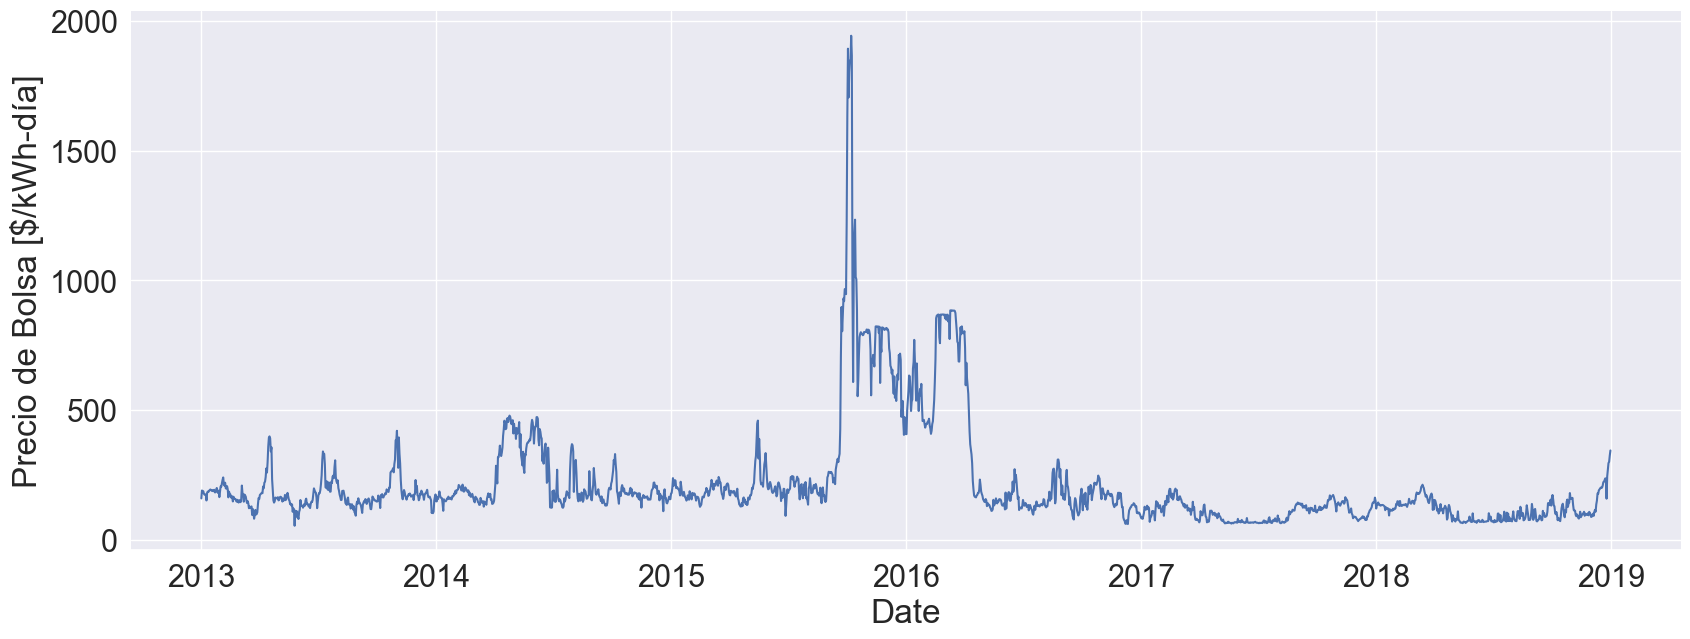

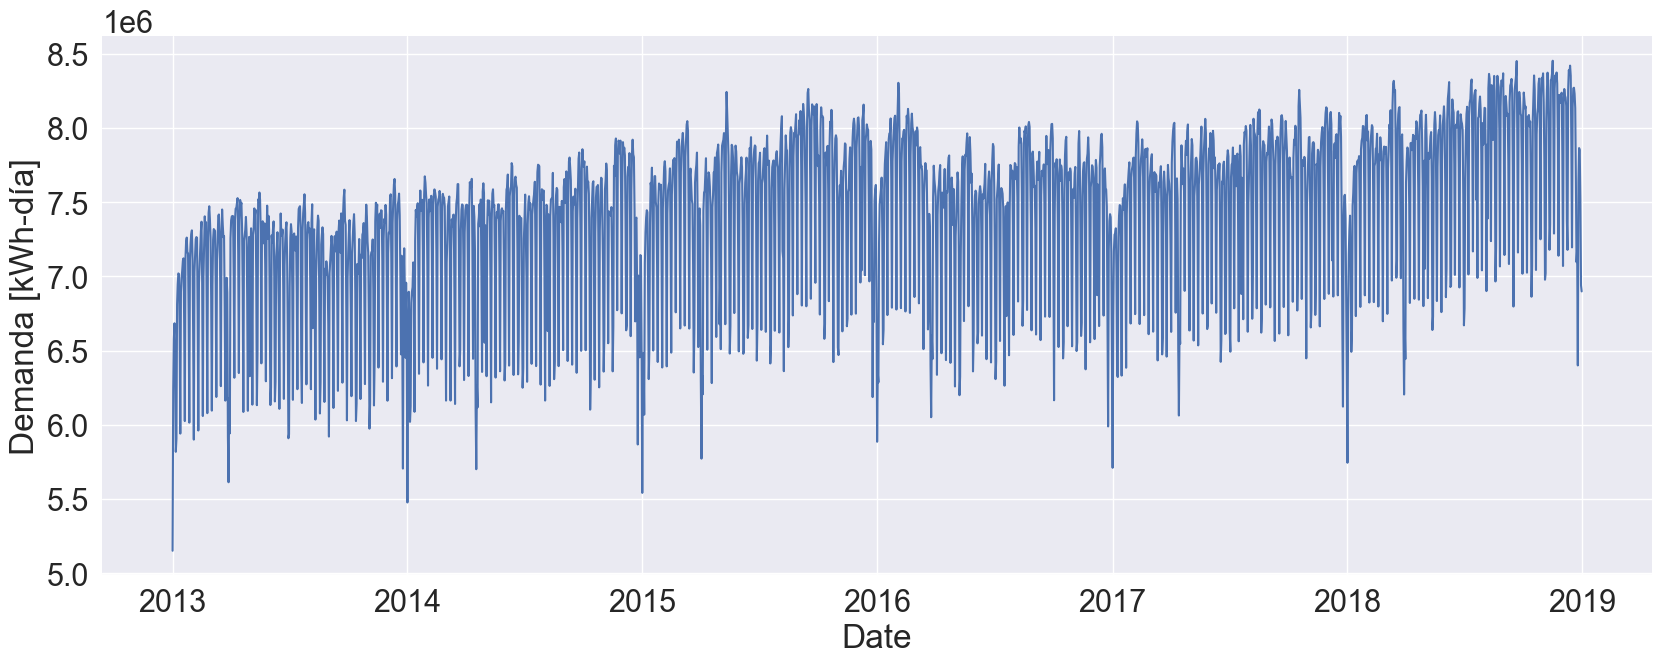

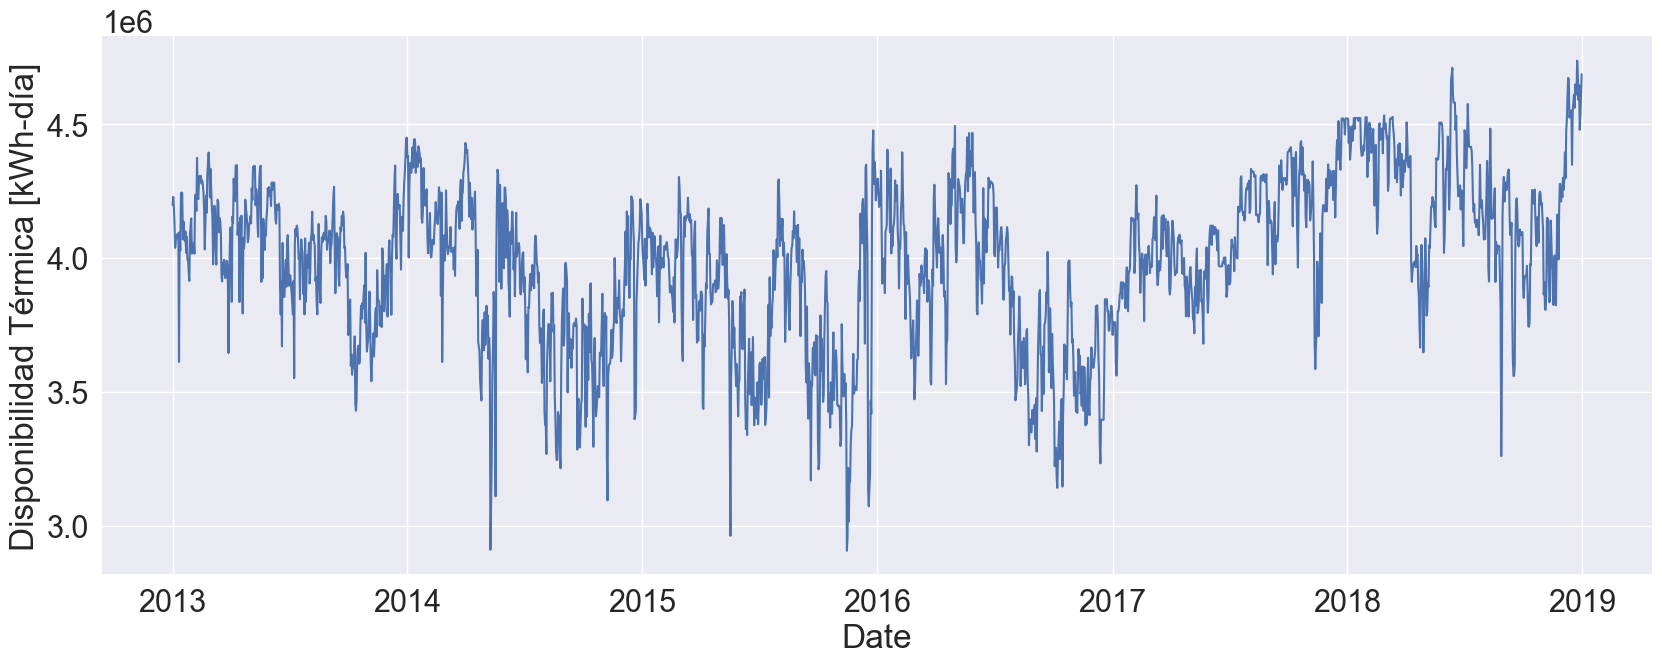

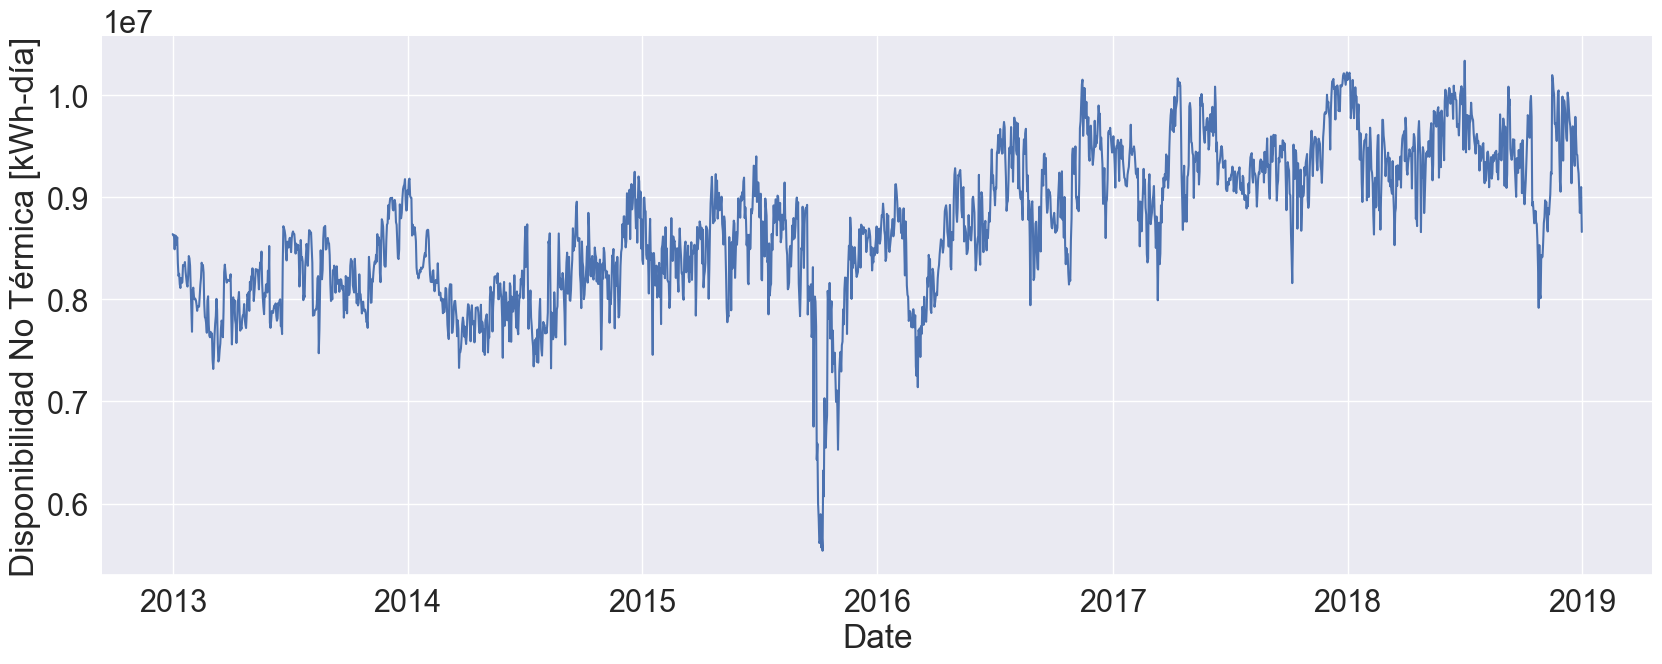

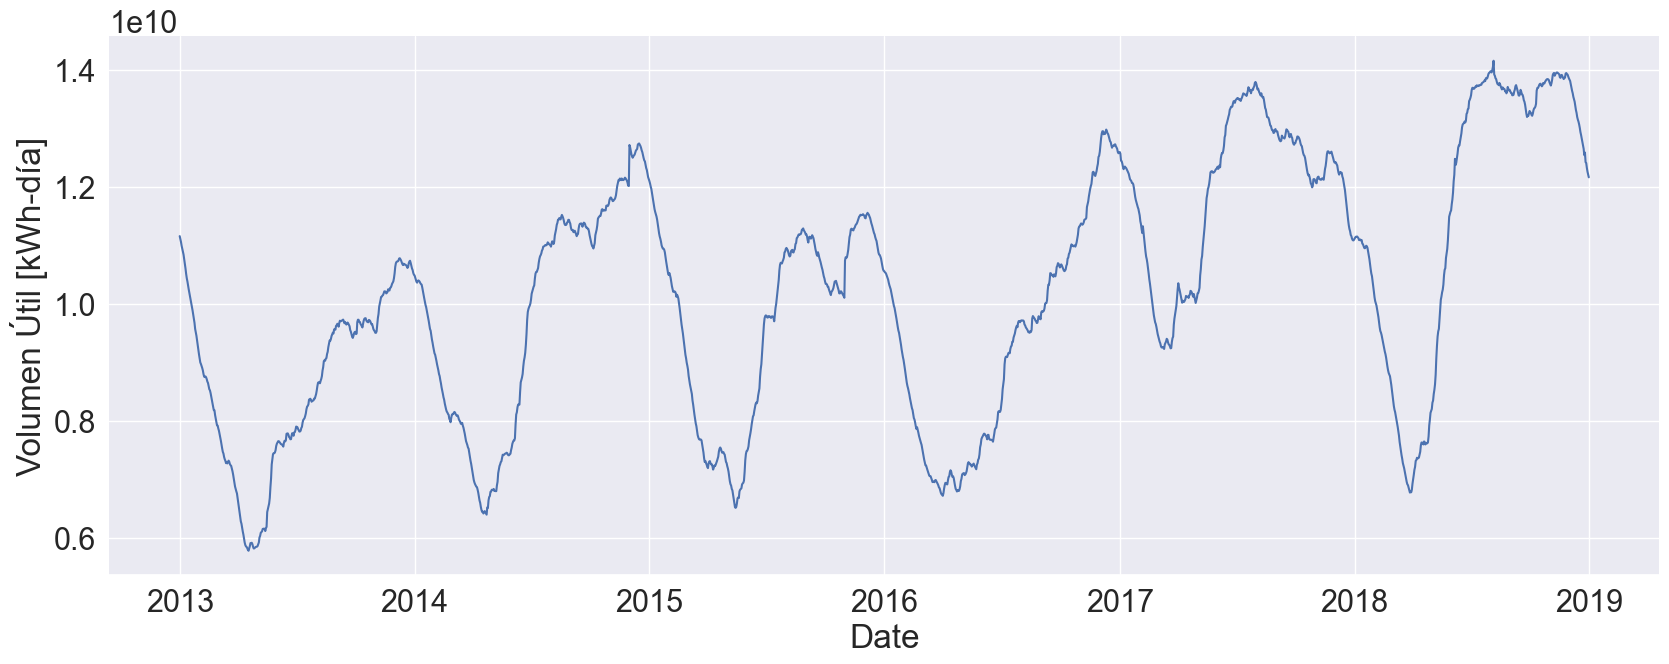

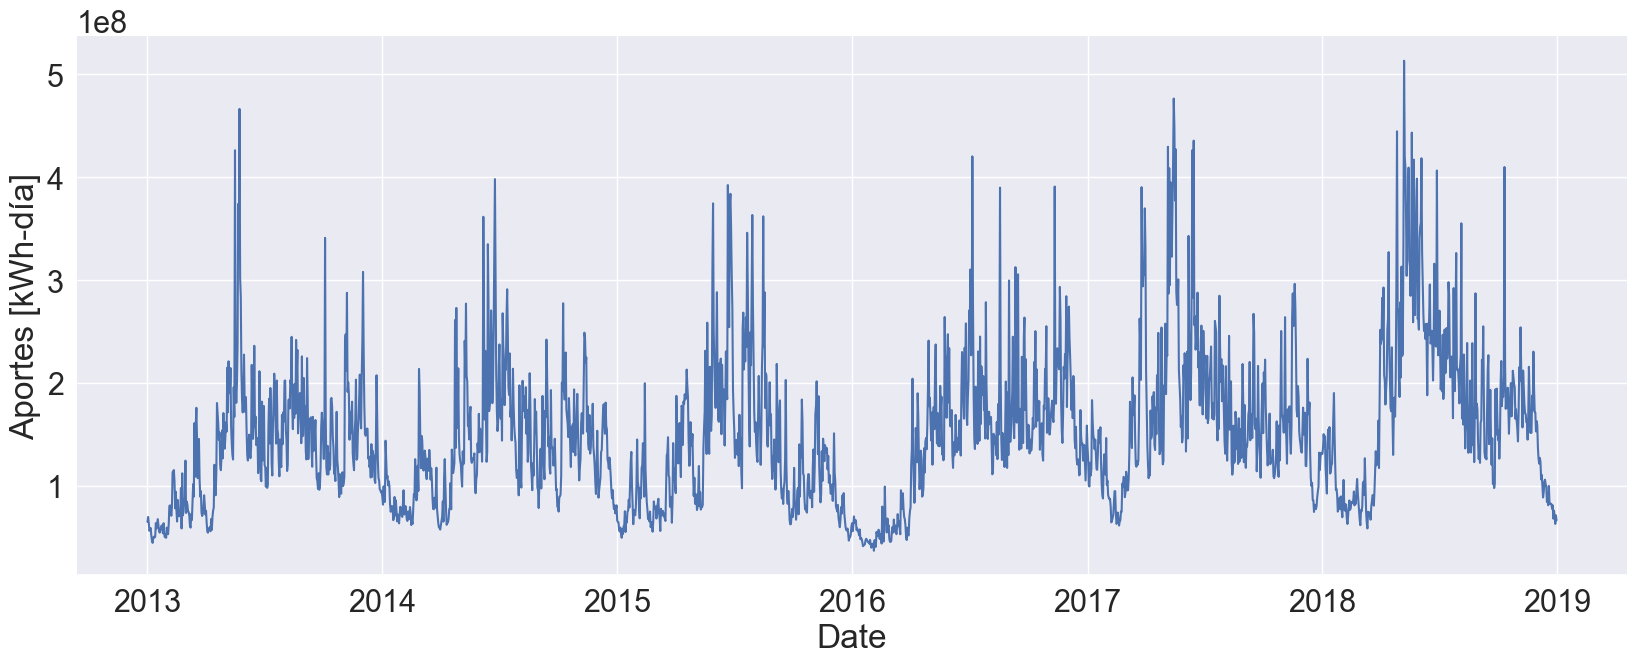

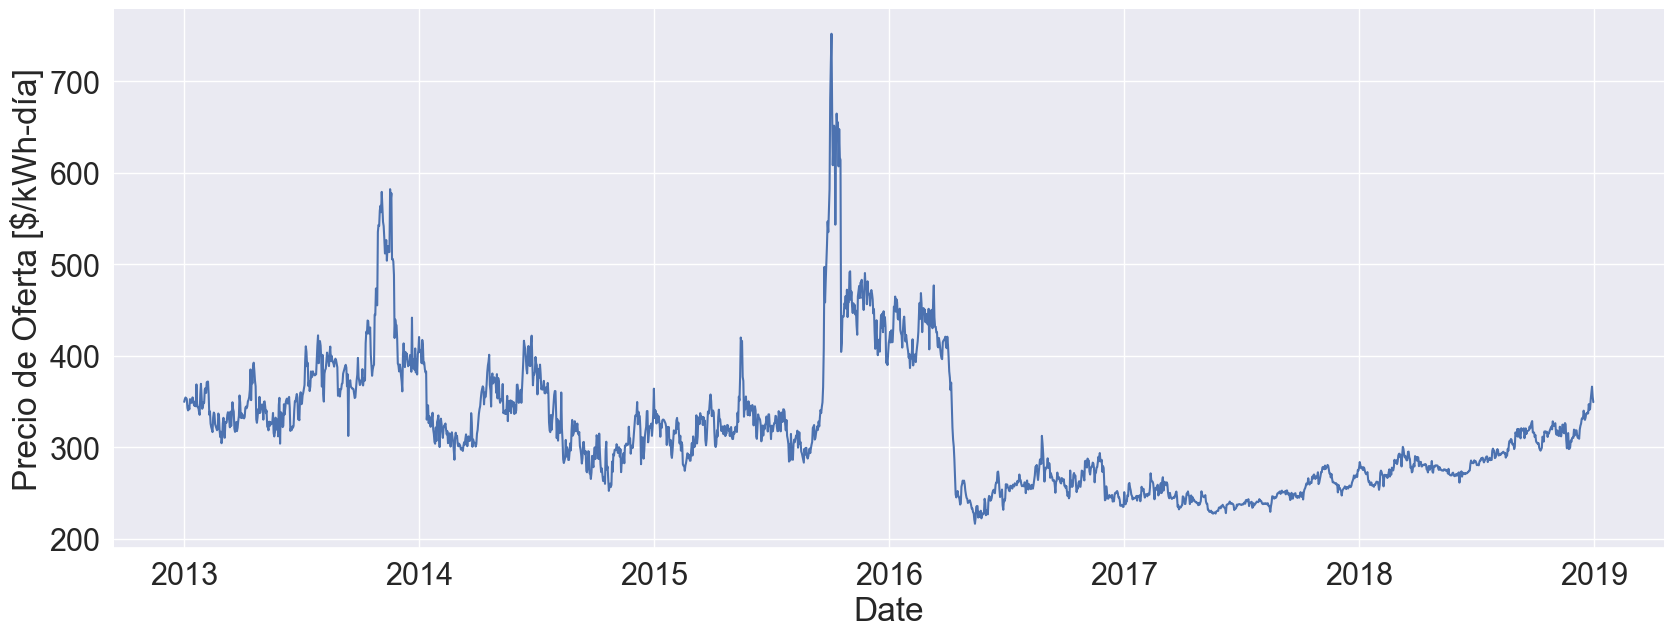

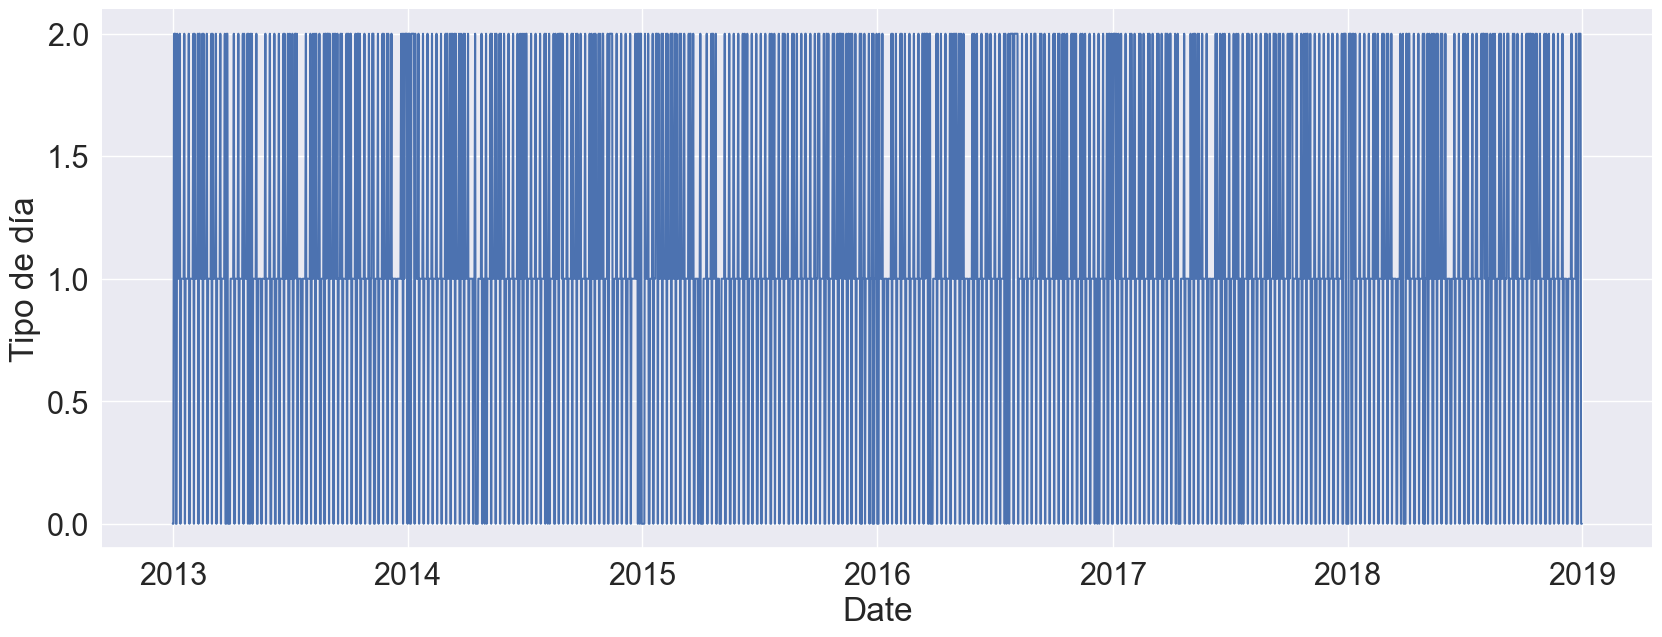

In [16]:
# Graficar datos
ncol=len(df_DataModel.columns)
name_column=list(df_DataModel.columns)

ylabels=['Precio de Bolsa [$/kWh-día]', 'Demanda [kWh-día]', 'Disponibilidad Térmica [kWh-día]','Disponibilidad No Térmica [kWh-día]', \
'Volumen Útil [kWh-día]','Aportes [kWh-día]','Precio de Oferta [$/kWh-día]','Tipo de día']

for i in range(1,9):
    plt.figure(i)
    dataGraf=df_DataModel[[name_column[0],name_column[i]]]
    sns.set(rc={'figure.figsize':(20,7)})
    sns.set_style("whitegrid")
    # plt.rcParams["font.family"] = "Times New Roman" 
    sns.set(font_scale=2)
    sns.lineplot(data = dataGraf, x='Date', y=name_column[i])
    plt.ylabel(ylabels[i-1])
    sns.despine(left=True)
    file=os.path.join(s_prt_path,'graficos\\' + str(name_column[i]) + '.jpg')
    plt.savefig(file, format="jpg", bbox_inches="tight")


['Date', 'PrecioB', 'Demanda', 'DispTer', 'DispNoTer', 'VolUtil', 'Aportes', 'PrecioO', 'day_cls']


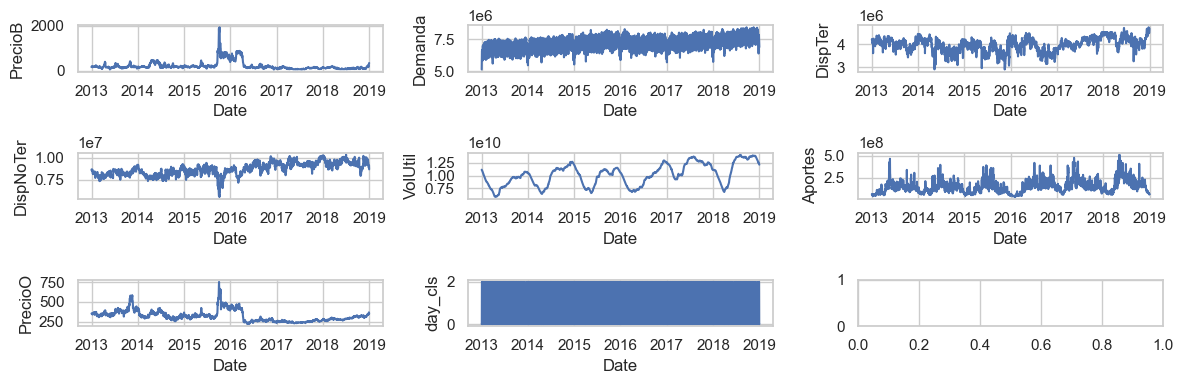

In [55]:

fig, axs=plt.subplots(3, 3,figsize=(12, 4))
i=0
i1=0
variables=list(df_DataModel.columns)
print(variables)
for k in range(1,9):

    # Plot variables
    ylabel=variables[k]
    axs[i,i1].plot(df_DataModel['Date'], df_DataModel[variables[k]])
    axs[i,i1].set_xlabel('Date')
    axs[i,i1].set_ylabel(ylabel)
    #axs[i,k-1].set_title('k=' + str(k))
    i1+=1

    if i1==3 and i==0:
        i=1
        i1=0
    elif i1==3 and i==1:
        i=2
        i1=0

    # Add some spacing between subplots
    plt.tight_layout()

### Estadística descriptiva de los datos

In [56]:
df_DataModel.describe()

PrecioB       Demanda       DispTer     DispNoTer       VolUtil  \
count  2191.000000  2.191000e+03  2.191000e+03  2.191000e+03  2.191000e+03   
mean    217.137157  7.414400e+06  3.986184e+06  8.723259e+06  1.018308e+10   
std     202.965712  5.558026e+05  3.014107e+05  7.140435e+05  2.170414e+09   
min      54.544145  5.151631e+06  2.907100e+06  5.537784e+06  5.776673e+09   
25%     121.467746  7.113321e+06  3.801208e+06  8.186930e+06  8.207759e+09   
50%     159.545420  7.528382e+06  4.018206e+06  8.705790e+06  1.027174e+10   
75%     202.379137  7.818783e+06  4.195997e+06  9.278591e+06  1.193968e+10   
max    1942.692797  8.452239e+06  4.736833e+06  1.033788e+07  1.415296e+10   

            Aportes      PrecioO      day_cls  
count  2.191000e+03  2191.000000  2191.000000  
mean   1.505963e+08   319.075977     1.045641  
std    7.123659e+07    70.423340     0.657043  
min    3.678070e+07   216.628100     0.000000  
25%    9.823780e+07   266.308748     1.000000  
50%    1.413808e+08   309.160917     1.000000  
75%    1.840036e+08   349.728100     1.000000  
max    5.133595e+08   752.076424     2.000000

#### Escalamiento con MinMaxScaler

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
df_DataAnalisis=df_DataModel[variables[1::]]

In [59]:
df_DataAnalisis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 0 to 2190
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PrecioB    2191 non-null   float64
 1   Demanda    2191 non-null   float64
 2   DispTer    2191 non-null   float64
 3   DispNoTer  2191 non-null   float64
 4   VolUtil    2191 non-null   float64
 5   Aportes    2191 non-null   float64
 6   PrecioO    2191 non-null   float64
 7   day_cls    2191 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 154.1 KB


In [60]:
MinMax = MinMaxScaler(copy=True, feature_range=(0, 1)) 
nombres = df_DataAnalisis.columns
Datos_Min_Max = MinMax.fit_transform(df_DataAnalisis)
Datos_Min_Max = pd.DataFrame(Datos_Min_Max, columns = nombres)

In [61]:
Datos_Min_Max.head(10)

PrecioB   Demanda   DispTer  DispNoTer   VolUtil   Aportes   PrecioO  \
0  0.055803  0.000000  0.706032   0.646216  0.642093  0.059173  0.248785   
1  0.071997  0.331087  0.722182   0.643138  0.636573  0.068890  0.254262   
2  0.067976  0.432734  0.701482   0.644157  0.630104  0.057021  0.257619   
3  0.070473  0.464244  0.666190   0.615228  0.622251  0.040725  0.256532   
4  0.065470  0.390801  0.618085   0.643389  0.615797  0.044064  0.254434   
5  0.063379  0.201914  0.632816   0.642240  0.610265  0.046334  0.236368   
6  0.063762  0.228478  0.640582   0.624948  0.604120  0.030473  0.231260   
7  0.063785  0.502868  0.645691   0.639746  0.594920  0.020266  0.240532   
8  0.051644  0.543632  0.639146   0.587046  0.585118  0.016051  0.233596   
9  0.067301  0.566033  0.648161   0.560901  0.576101  0.026776  0.254273   

   day_cls  
0      0.0  
1      0.0  
2      1.0  
3      1.0  
4      1.0  
5      0.0  
6      0.0  
7      1.0  
8      0.5  
9      0.5

In [62]:
df_DataModel.head(10)

Date     PrecioB       Demanda       DispTer     DispNoTer  \
0 2013-01-01  159.908983  5.151631e+06  4.198950e+06  8.639680e+06   
1 2013-01-02  190.486107  6.244420e+06  4.228500e+06  8.624906e+06   
2 2013-01-03  182.892747  6.579915e+06  4.190625e+06  8.629798e+06   
3 2013-01-04  187.607620  6.683919e+06  4.126049e+06  8.490937e+06   
4 2013-01-05  178.161160  6.441511e+06  4.038031e+06  8.626110e+06   
5 2013-01-06  174.213880  5.818069e+06  4.064985e+06  8.620594e+06   
6 2013-01-07  174.935468  5.905747e+06  4.079194e+06  8.537594e+06   
7 2013-01-08  174.978940  6.811401e+06  4.088542e+06  8.608623e+06   
8 2013-01-09  152.056558  6.945948e+06  4.076567e+06  8.355658e+06   
9 2013-01-10  181.618047  7.019884e+06  4.093062e+06  8.230159e+06   

        VolUtil     Aportes     PrecioO  day_cls  
0  1.115503e+10  64981500.0  349.839712        0  
1  1.110879e+10  69612400.0  352.772108        0  
2  1.105461e+10  63955500.0  354.570024        2  
3  1.098883e+10  56189600.0  353.987962        2  
4  1.093476e+10  57780600.0  352.864503        2  
5  1.088843e+10  58862700.0  343.191191        0  
6  1.083696e+10  51303300.0  340.455816        0  
7  1.075990e+10  46439200.0  345.420357        2  
8  1.067779e+10  44430300.0  341.706899        1  
9  1.060226e+10  49541500.0  352.778295        1

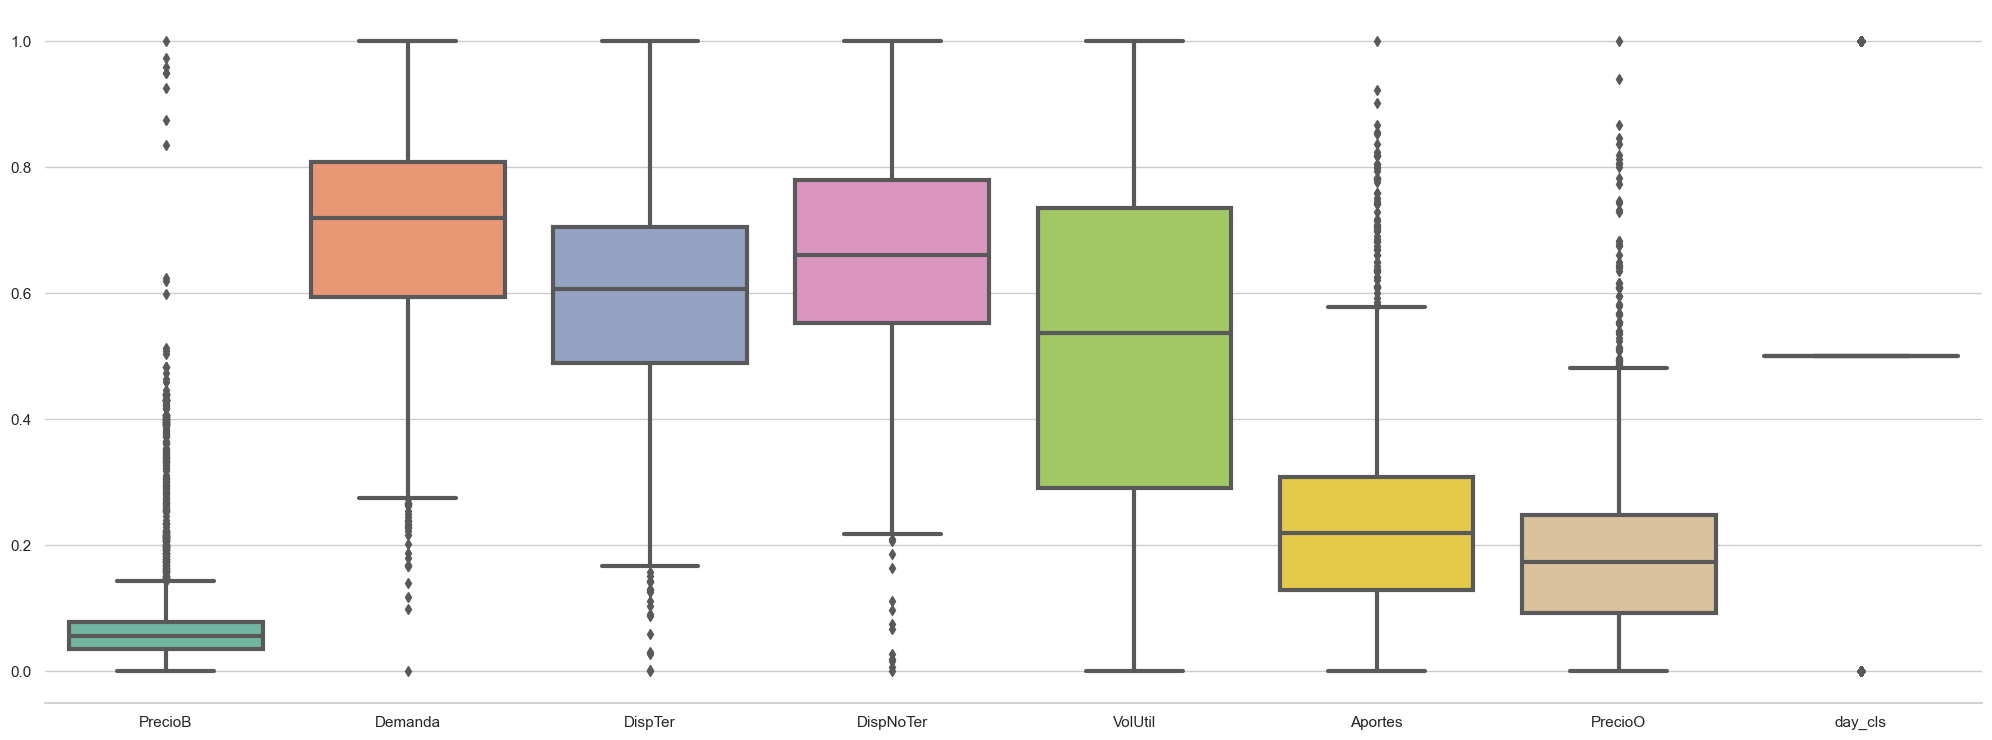

In [63]:
#Se realiza un diagrama de cajas a los datos normalizados
sns.set(rc={'figure.figsize':(25,9)}) 
sns.set(style="whitegrid") 
sns.boxplot(data = Datos_Min_Max, linewidth = 3, palette="Set2", fliersize = 5)
sns.despine(left=True)

#### Gráfica para observar la correlación y distribución de las variables

In [64]:
Features = Datos_Min_Max

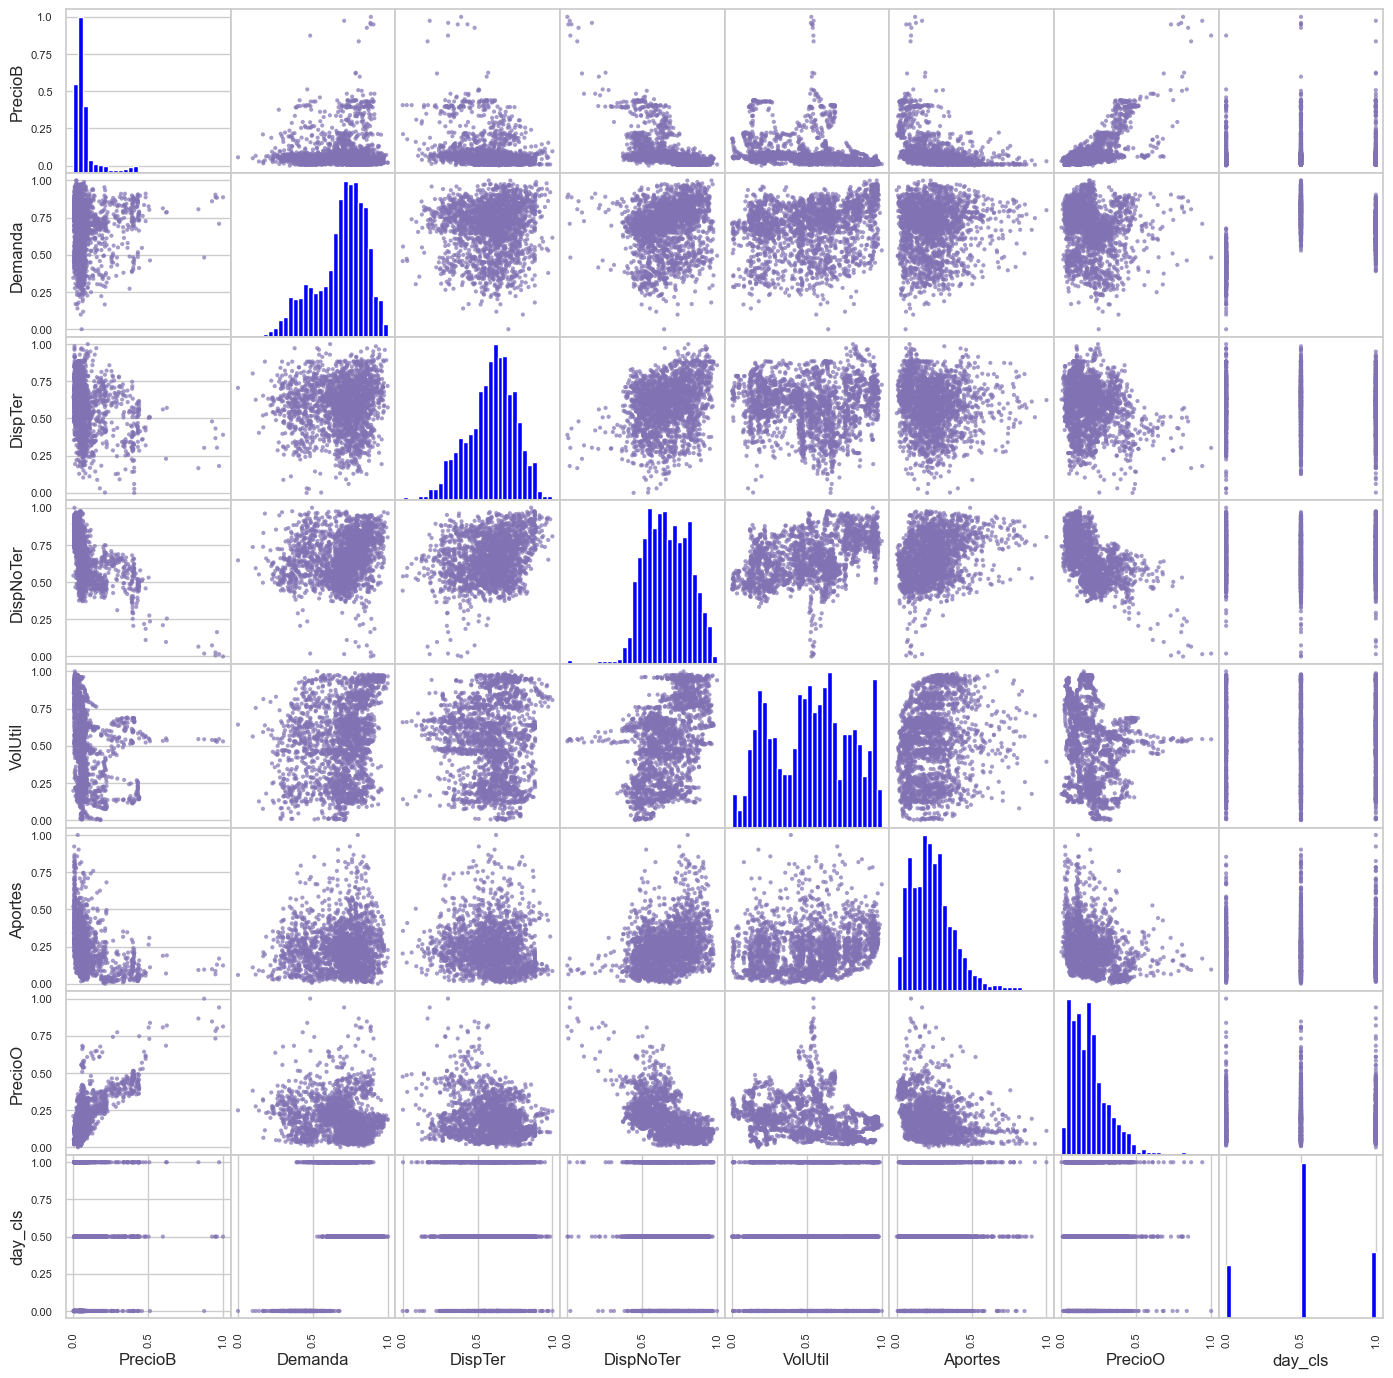

In [65]:
#Se realiza una gráfica para observar la correlación de los datos
pd.plotting.scatter_matrix(Features, alpha=0.7, figsize=(17,17), range_padding = 0.1, diagonal='hist',
                           color = 'm', hist_kwds = {'bins':30, 'color':'blue'}) # Grafica de dispersión e histograma
plt.show()

#### Gráfica para observar la correlación numérica de las varaibles

PrecioB   Demanda   DispTer  DispNoTer   VolUtil   Aportes  \
PrecioB    1.000000  0.051123 -0.292035  -0.548488 -0.233558 -0.334879   
Demanda    0.051123  1.000000  0.070803   0.190028  0.247925  0.057718   
DispTer   -0.292035  0.070803  1.000000   0.294410  0.018363 -0.086578   
DispNoTer -0.548488  0.190028  0.294410   1.000000  0.480450  0.324692   
VolUtil   -0.233558  0.247925  0.018363   0.480450  1.000000  0.199992   

            PrecioO   day_cls  
PrecioB    0.744162  0.022921  
Demanda   -0.151396  0.435539  
DispTer   -0.220469 -0.014529  
DispNoTer -0.606843 -0.005187  
VolUtil   -0.245625  0.019787

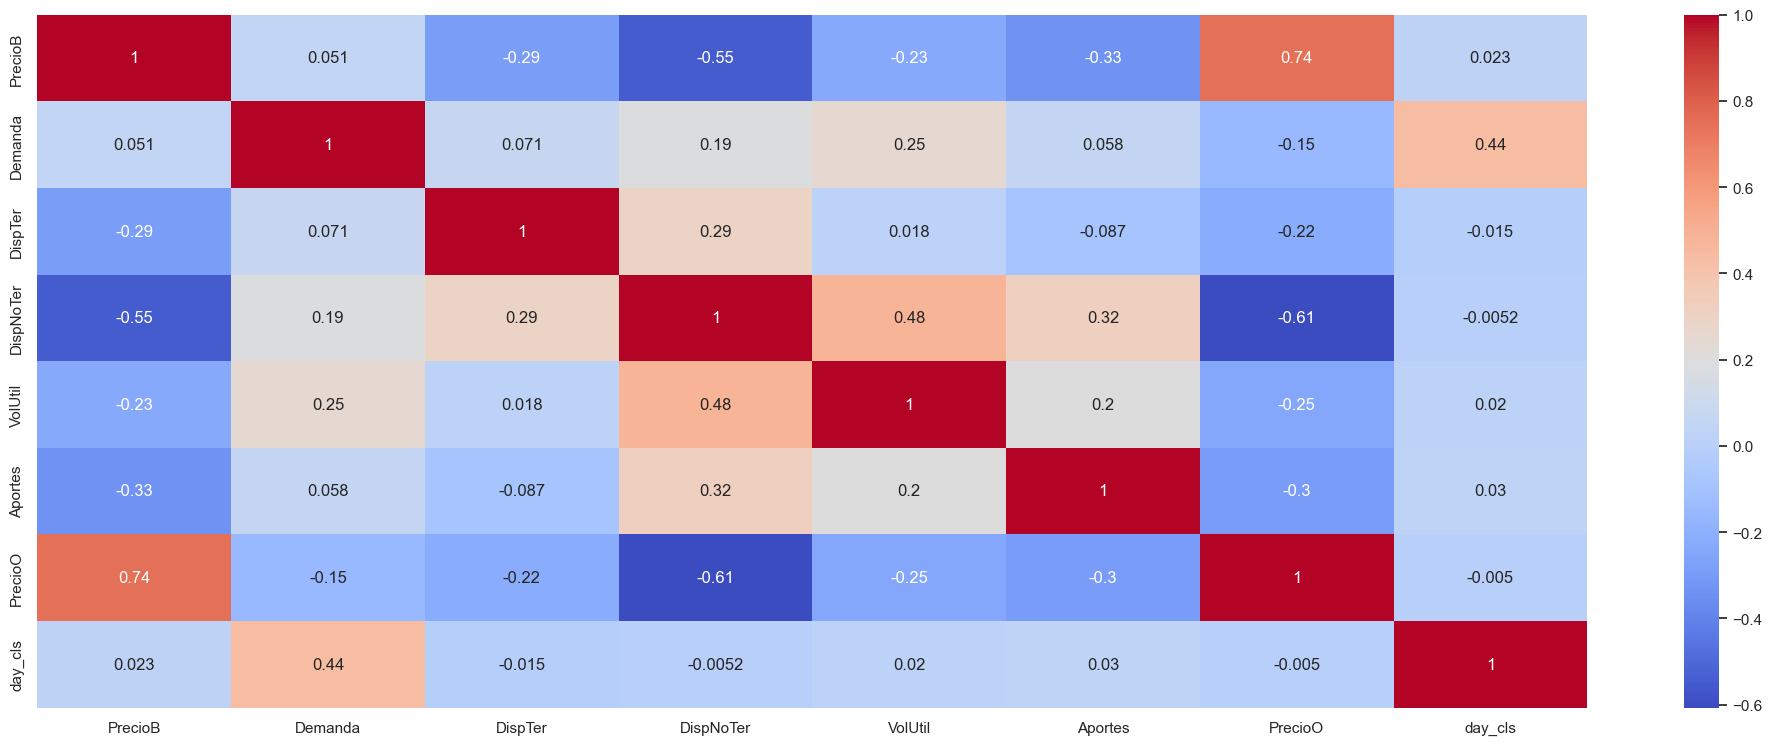

In [66]:
matriz_corr=Features.corr()
sns.heatmap(Features.corr(), annot=True, cmap='coolwarm')
matriz_corr.head()

#### Correlación de pearson

In [67]:
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [68]:
#Análisis con el coeficiente de correlación de person
r = []
valor_p = []
Data_Precio = Features.values
Data_Precio = np.asarray(Data_Precio)

for _,n in enumerate(np.arange(0,Data_Precio.shape[1])):
  for _,m in enumerate(np.arange(0,Data_Precio.shape[1])):  
      r_valor, p_valor = pearsonr(Data_Precio[:,n], Data_Precio[:,m])
      r.append(r_valor)
      valor_p.append(p_valor)

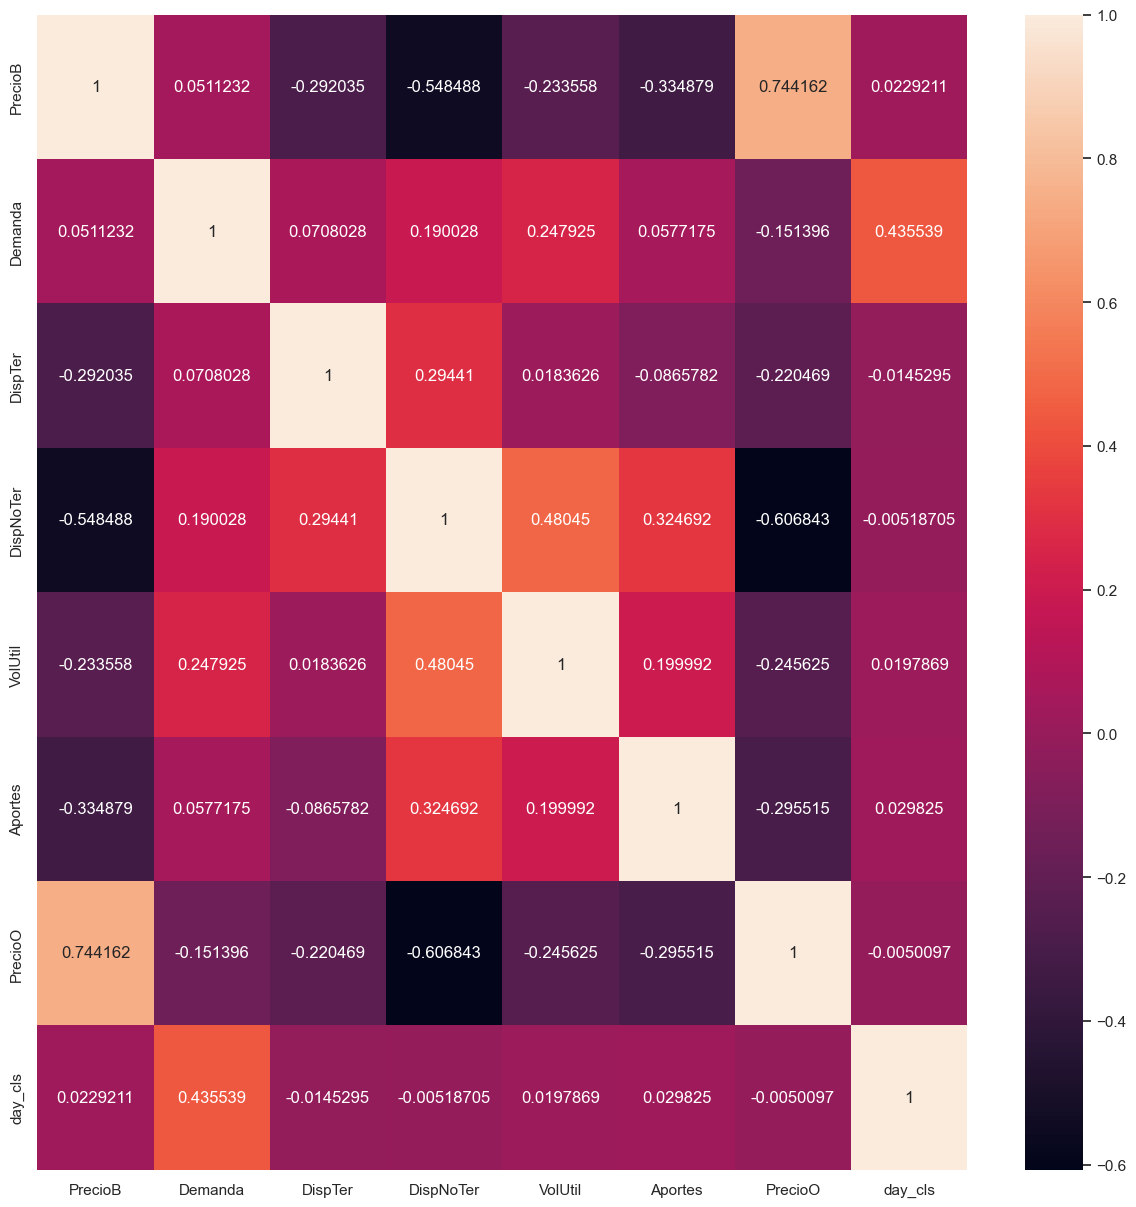

In [69]:
Caracteristicas = Features.columns
r = np.asarray(r)
valor_p = np.asarray(valor_p)

pearson_r = r.reshape(Data_Precio.shape[1],Data_Precio.shape[1])
p_value = valor_p.reshape(Data_Precio.shape[1],Data_Precio.shape[1])

plt.figure(figsize=(15,15))
ax = sns.heatmap(pearson_r, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

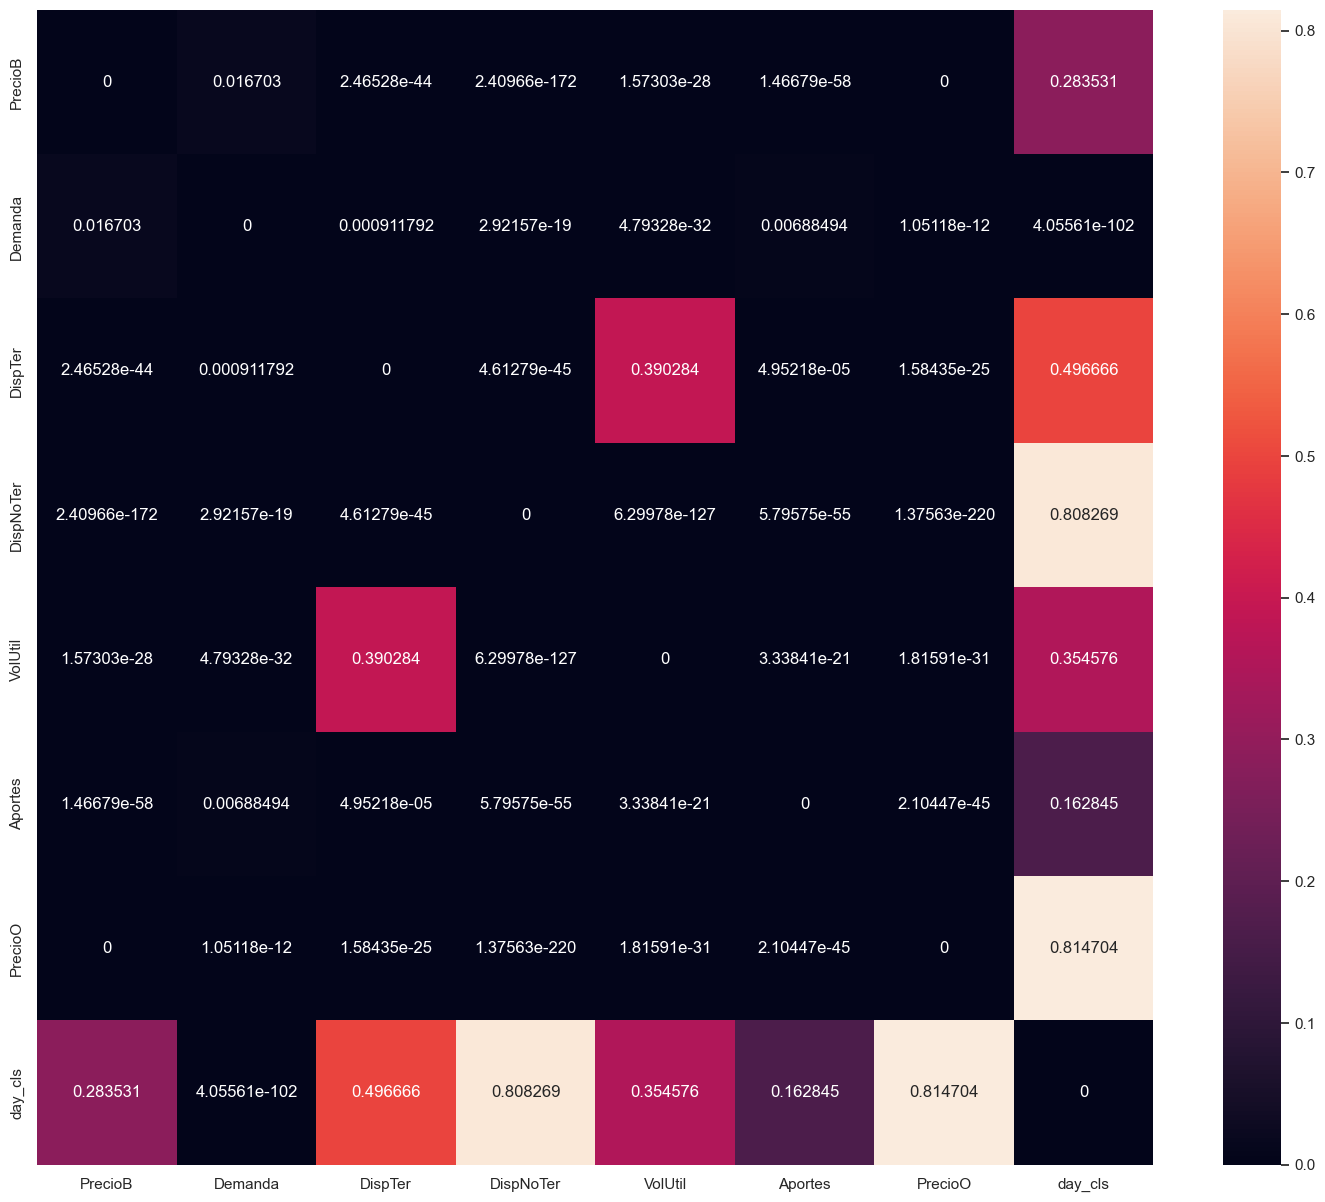

In [70]:
plt.figure(figsize=(18,15))
ax = sns.heatmap(p_value, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

#### Correlación de spearman

In [71]:
#Cálculo de la correlación de spearman
spearman = []
valor_ps = []
Data_Precio = Features.values
Data_Precio = np.asarray(Data_Precio)

for _,n in enumerate(np.arange(0,Data_Precio.shape[1])):
  for _,m in enumerate(np.arange(0,Data_Precio.shape[1])):  
      s_valor, p_valor = spearmanr(Data_Precio[:,n], Data_Precio[:,m])
      spearman.append(s_valor)
      valor_ps.append(p_valor)

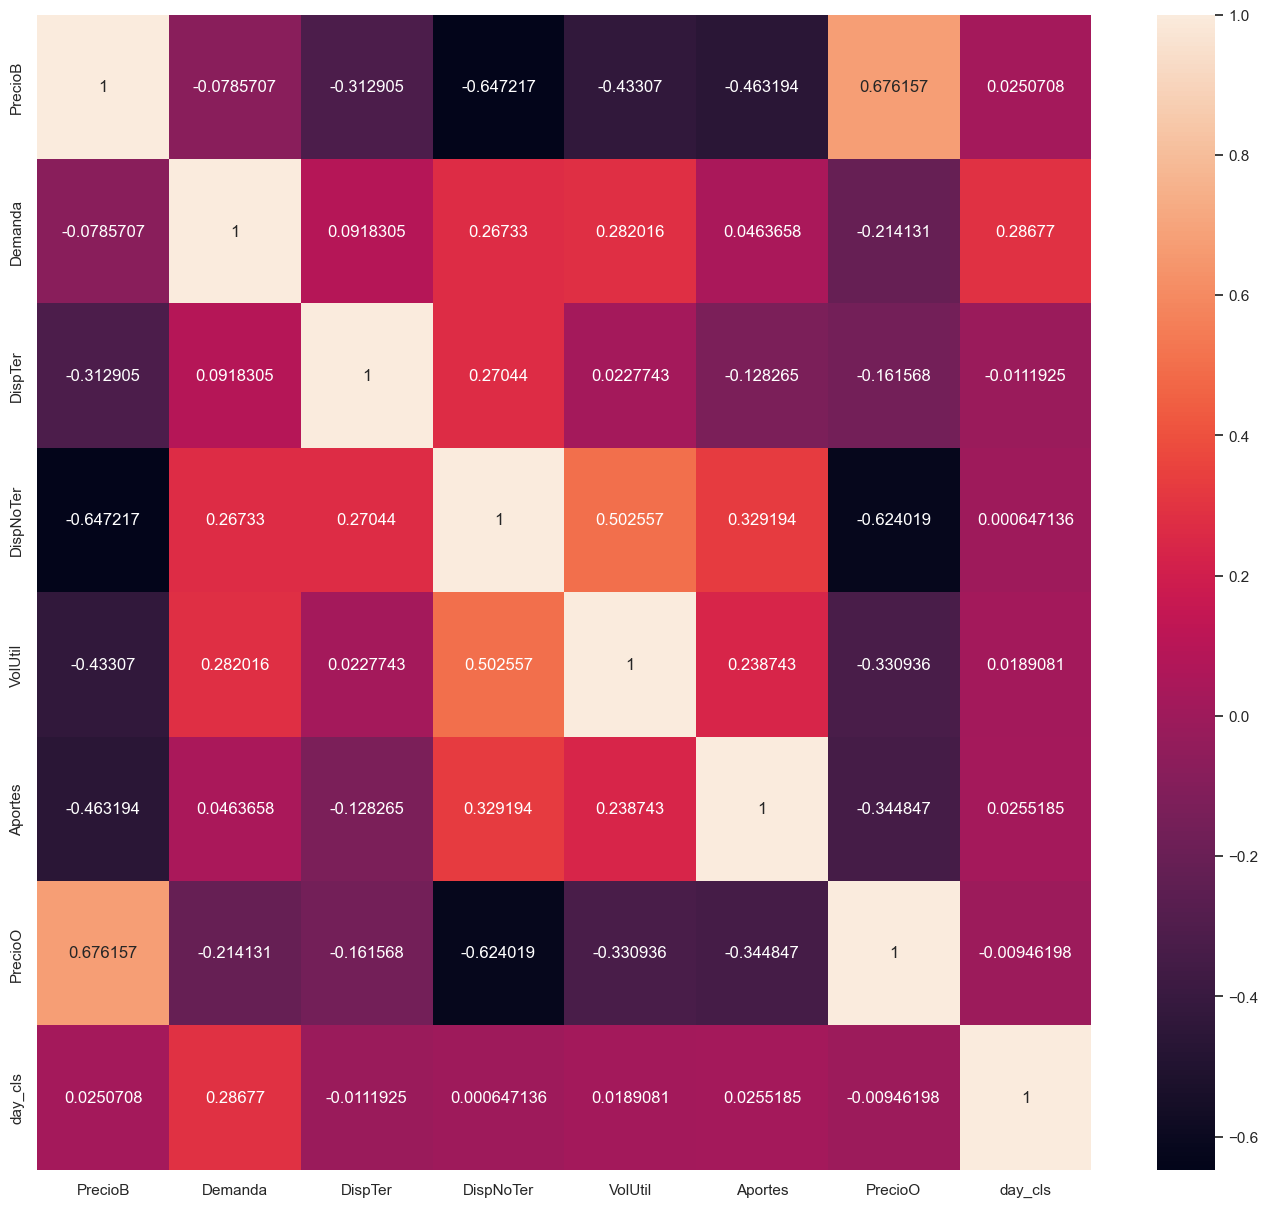

In [72]:
spearman = np.asarray(spearman)
valor_ps = np.asarray(valor_ps)

spearman_r = spearman.reshape(Data_Precio.shape[1],Data_Precio.shape[1])
p_value_s = valor_ps.reshape(Data_Precio.shape[1],Data_Precio.shape[1])

plt.figure(figsize=(17,15))
ax = sns.heatmap(spearman_r, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

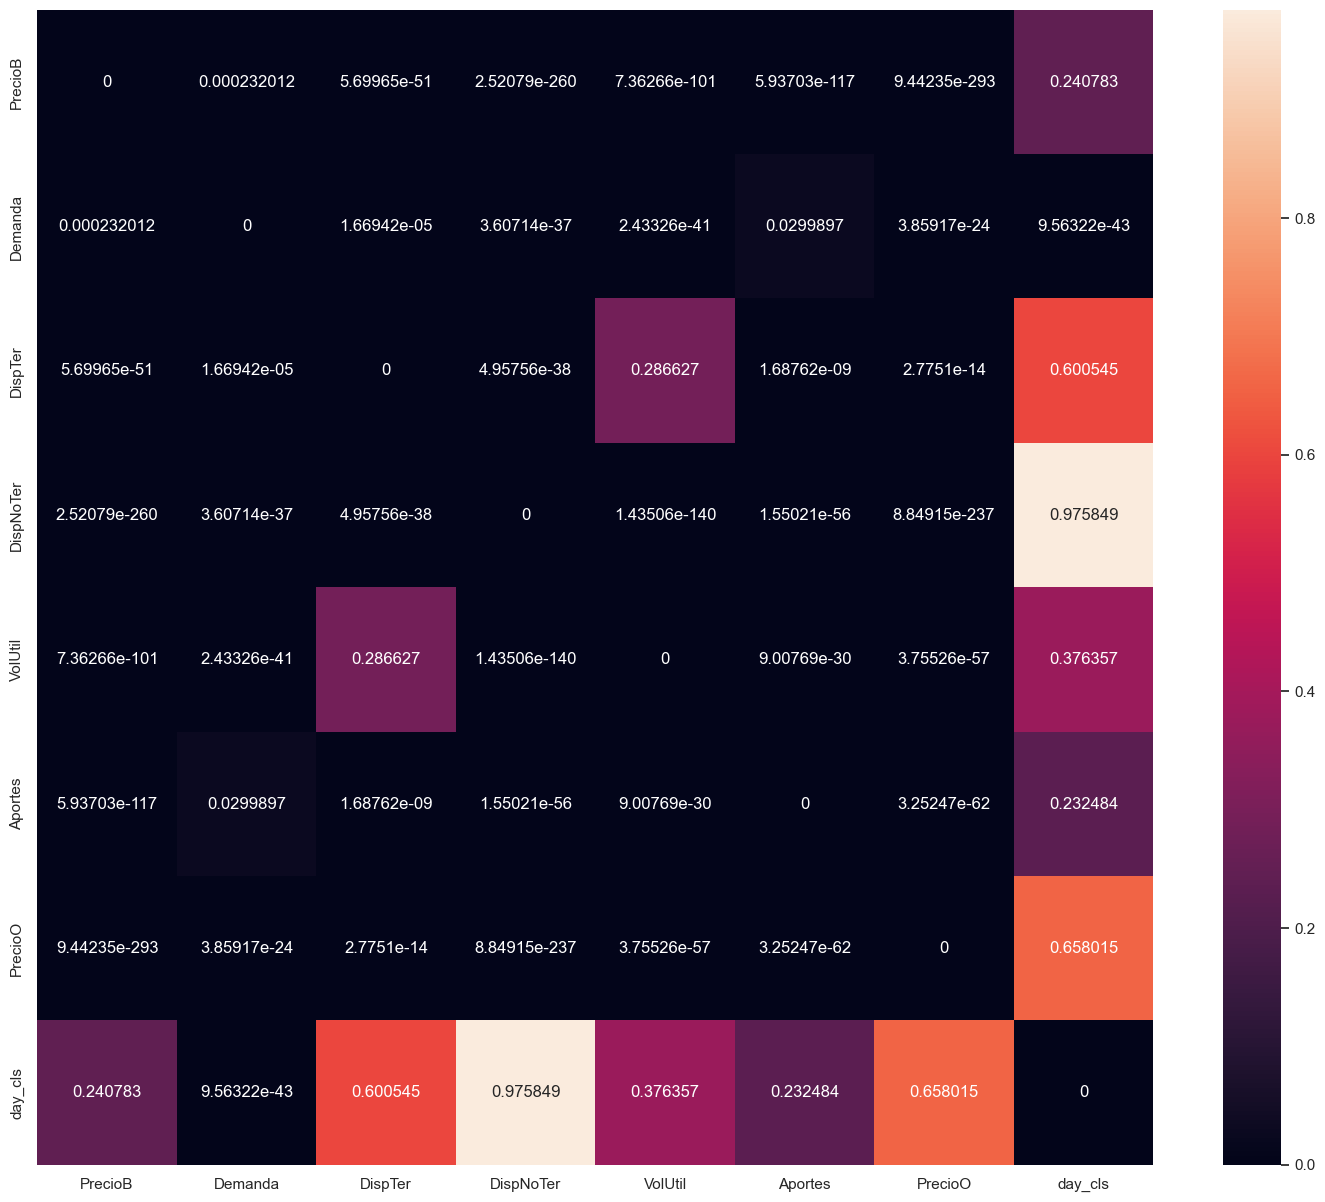

In [73]:
plt.figure(figsize=(18,15))
ax = sns.heatmap(p_value_s, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

#### Importancia de las características

In [89]:
X=Features[['PrecioB','Demanda','DispTer','DispNoTer','VolUtil','Aportes','PrecioO','day_cls']]
#X=Features[['Disp','PrecioO','DispNoTer','Demanda','DispTer','VolUtil','Aportes']]

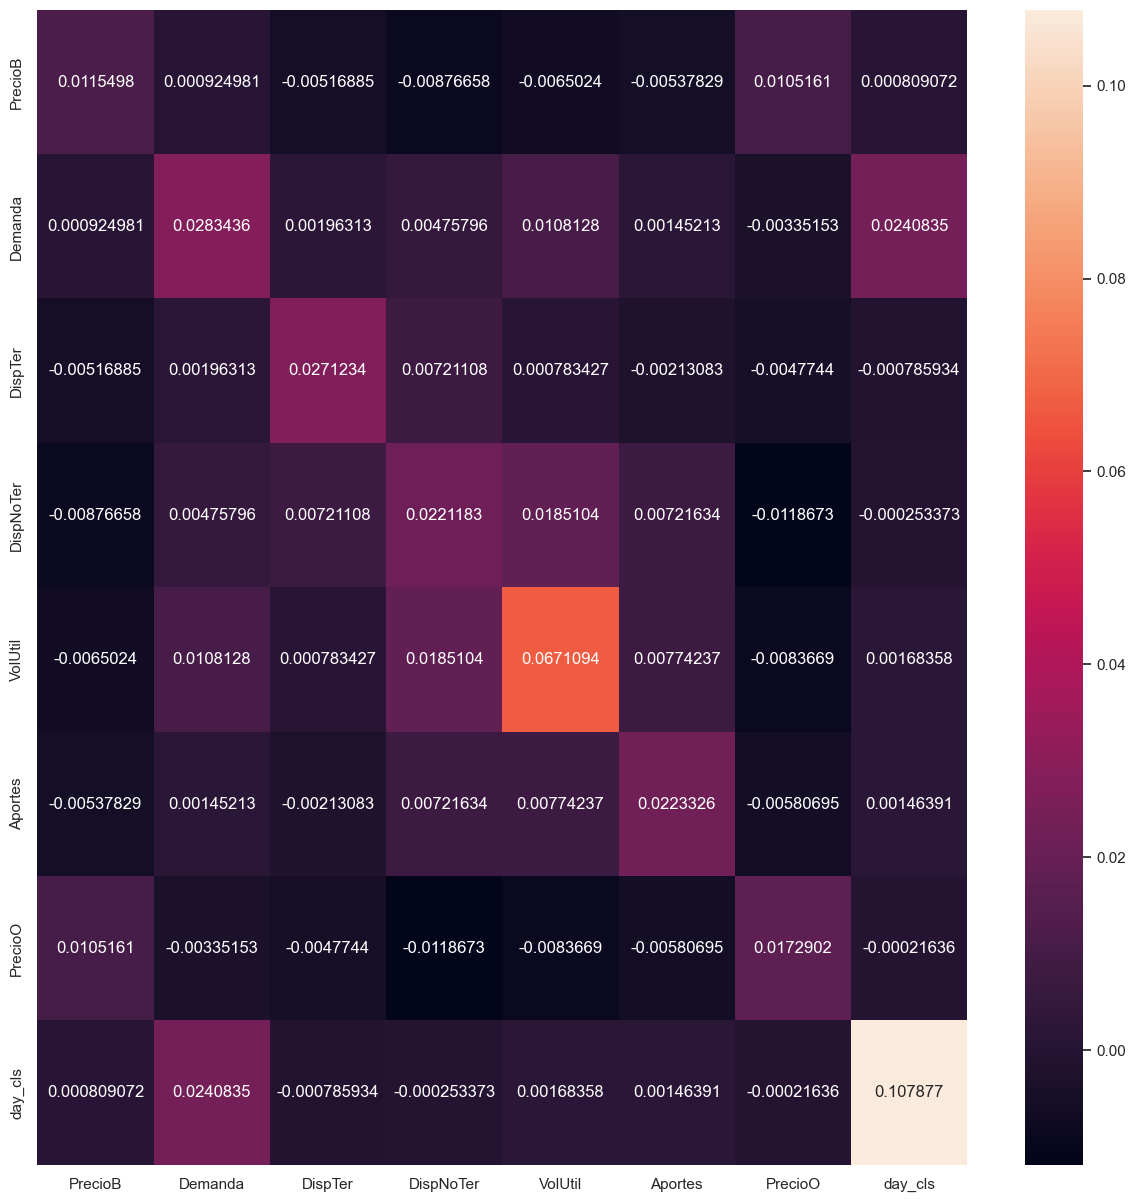

In [90]:
Matrix_Covarianza = np.cov(X.transpose(), bias=True) # bias = True normaliza los datos (les recomienda esa opción)
Caracteristicas = X.columns

plt.figure(figsize=(15,15))
ax = sns.heatmap(Matrix_Covarianza, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()


In [91]:
eigen_values, eigen_vectors = np.linalg.eig(Matrix_Covarianza)

In [92]:
eigen_values

array([0.11531394, 0.08239335, 0.03627991, 0.00295232, 0.00765496,
       0.02622451, 0.01344159, 0.01948389])

In [99]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)
print(variance_explained)

[37.96412838374844, 27.1258772342563, 11.944219699209112, 0.9719754987133921, 2.520197815770562, 8.633739467592047, 4.425297032167761, 6.414564868542351]


#### Método 2 para la importancia de las carácteríaticas

In [100]:
from sklearn.decomposition import PCA # Análisis de Componentes Principales

Num_Componentes = X.shape[1]
print(Num_Componentes)

pca = PCA(iterated_power='auto', n_components = Num_Componentes, random_state = 17, svd_solver='auto', tol = 1e-3, whiten = False)

8


In [101]:
Variables_Principales = pca.fit_transform(X) 

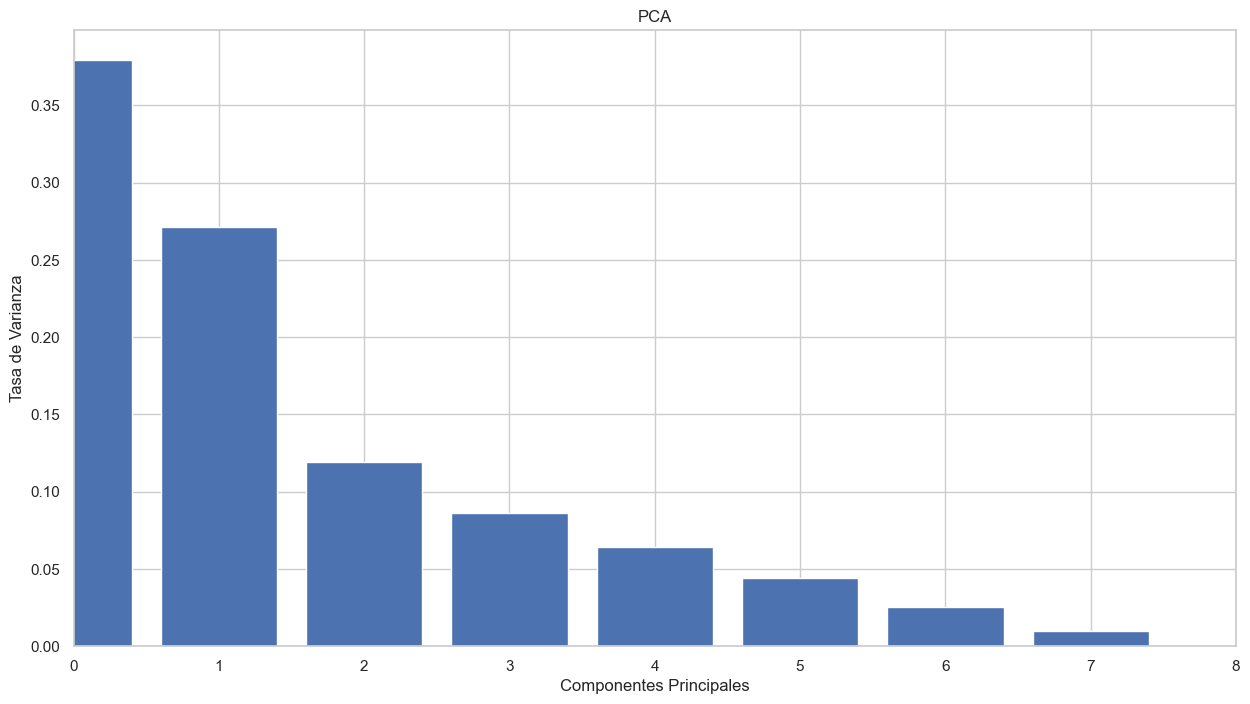

In [102]:
Varianza = pca.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las componentes principales

fig = plt.figure(figsize=(15,8))
plt.bar(np.arange(len(Varianza)), Varianza)
plt.xlabel('Componentes Principales')
plt.ylabel('Tasa de Varianza')
plt.title('PCA')
plt.xlim(0, len(Varianza))
plt.show()

In [108]:
Importancia_Componentes

0         1         2         3         4         5         6  \
0  0.379641  0.271259  0.119442  0.086337  0.064146  0.044253  0.025202   

         7  
0  0.00972

In [107]:
Importancia_Componentes = pd.DataFrame(Varianza)
Importancia_Componentes = Importancia_Componentes.T
print("Porcentaje de Varianza detectada para las primeras 1 componentes: ", format(100*Importancia_Componentes.loc[:,0:0].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 2 componentes: ", format(100*Importancia_Componentes.loc[:,0:1].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 3 componentes: ", format(100*Importancia_Componentes.loc[:,0:2].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 4 componentes: ", format(100*Importancia_Componentes.loc[:,0:3].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 5 componentes: ", format(100*Importancia_Componentes.loc[:,0:4].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 6 componentes: ", format(100*Importancia_Componentes.loc[:,0:5].sum(axis = 1).values))
print("Porcentaje de Varianza detectada para las primeras 7 componentes: ", format(100*Importancia_Componentes.loc[:,0:6].sum(axis = 1).values))

Porcentaje de Varianza detectada para las primeras 1 componentes:  [37.96412838]
Porcentaje de Varianza detectada para las primeras 2 componentes:  [65.09000562]
Porcentaje de Varianza detectada para las primeras 3 componentes:  [77.03422532]
Porcentaje de Varianza detectada para las primeras 4 componentes:  [85.66796478]
Porcentaje de Varianza detectada para las primeras 5 componentes:  [92.08252965]
Porcentaje de Varianza detectada para las primeras 6 componentes:  [96.50782669]
Porcentaje de Varianza detectada para las primeras 7 componentes:  [99.0280245]


#### Análisis de autocorrelación

In [109]:
from statsmodels.graphics.tsaplots import plot_pacf

df_Data_pafc=df_DataModel.copy()
df_Data_pafc.set_index('Date',inplace=True)
names_col=df_Data_pafc.columns


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


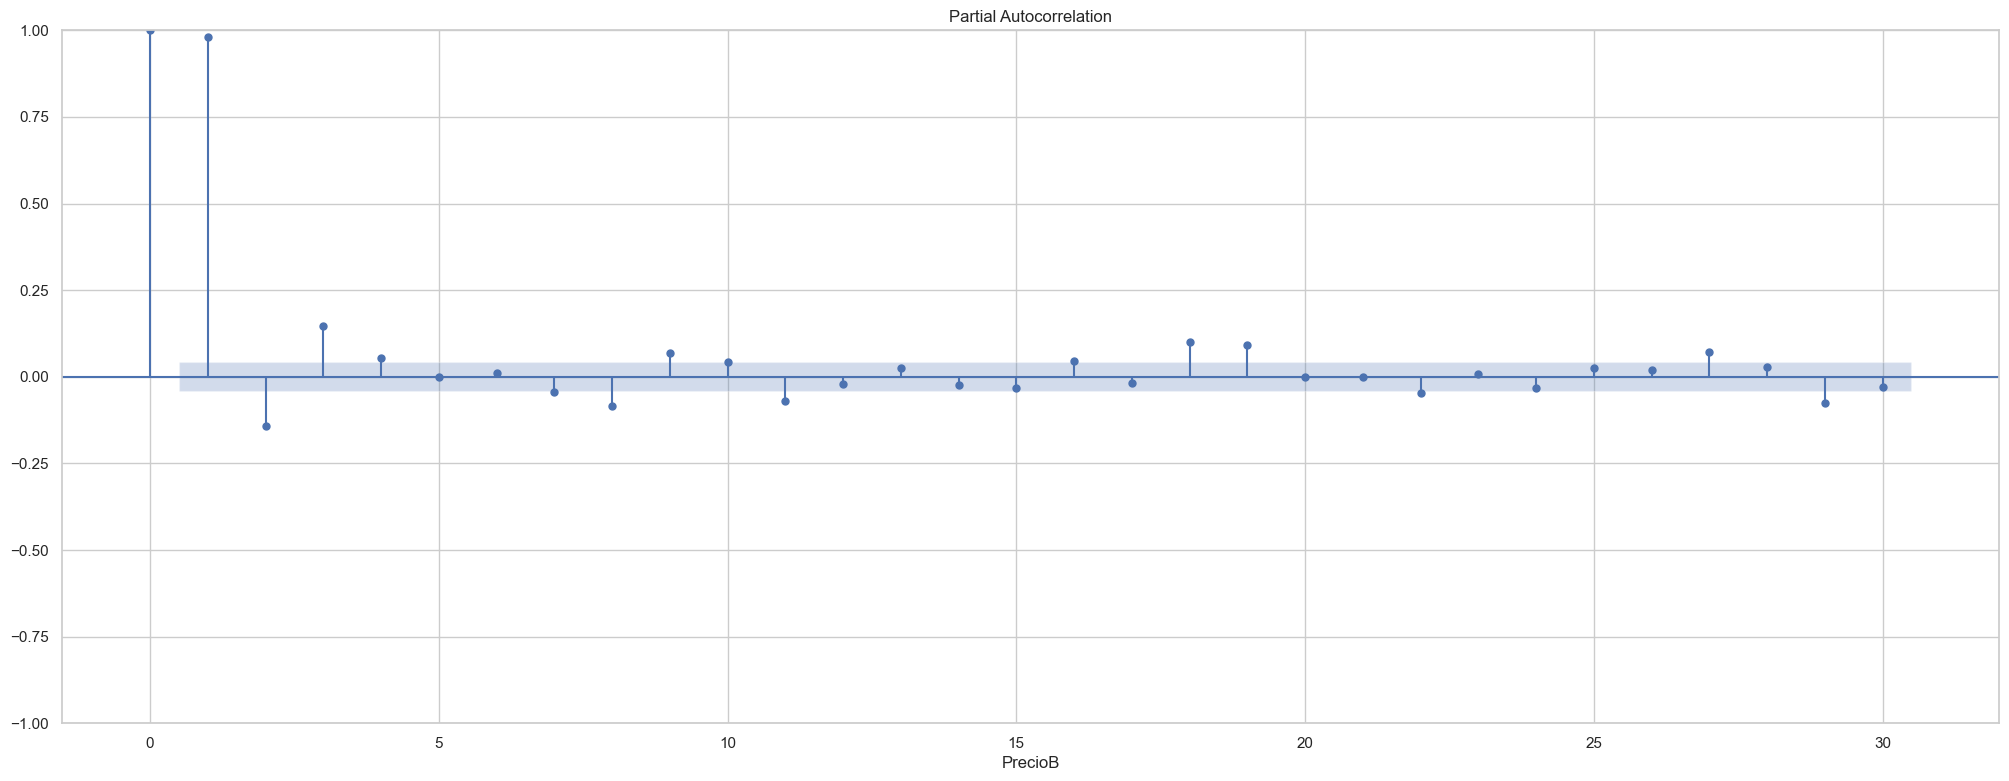

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


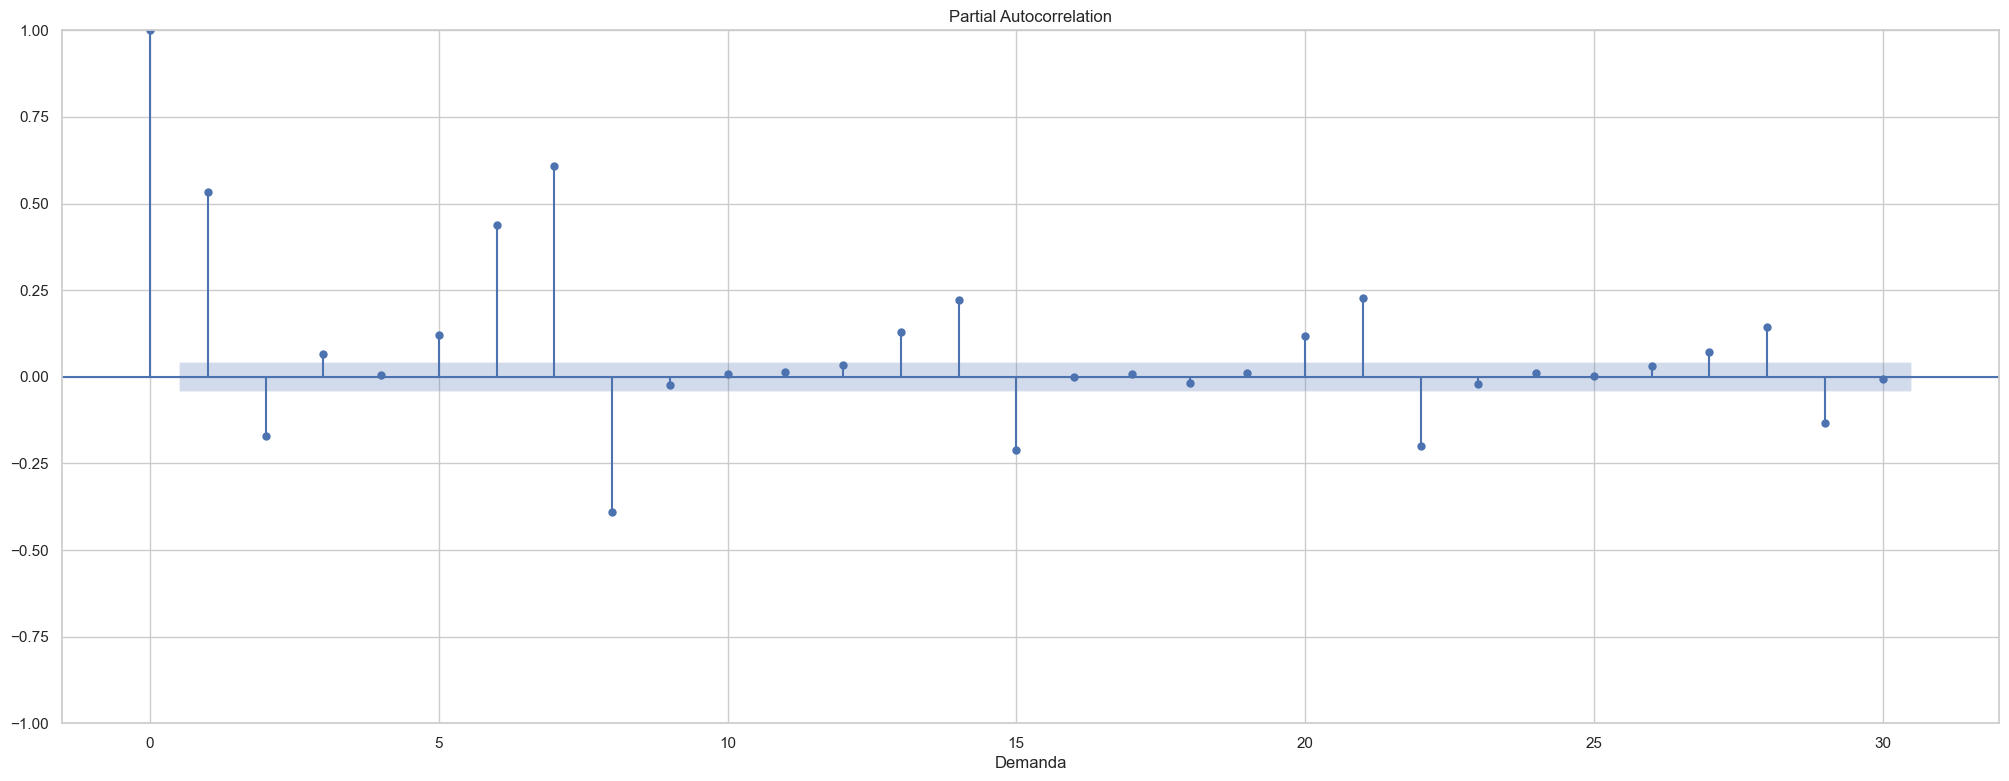

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


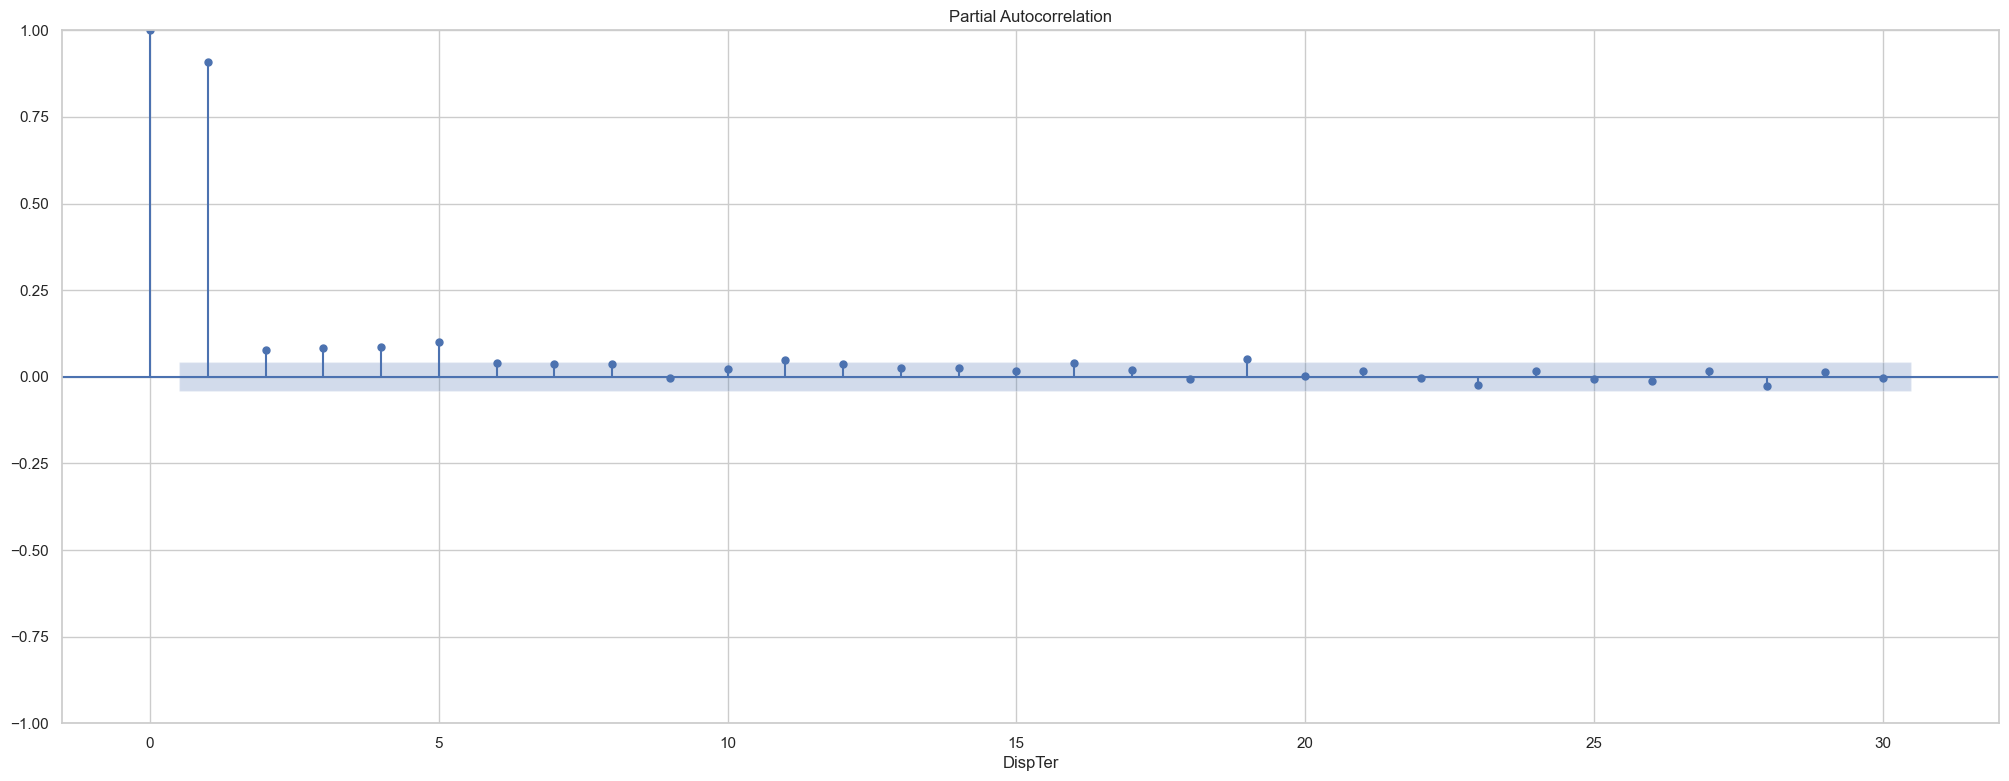

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


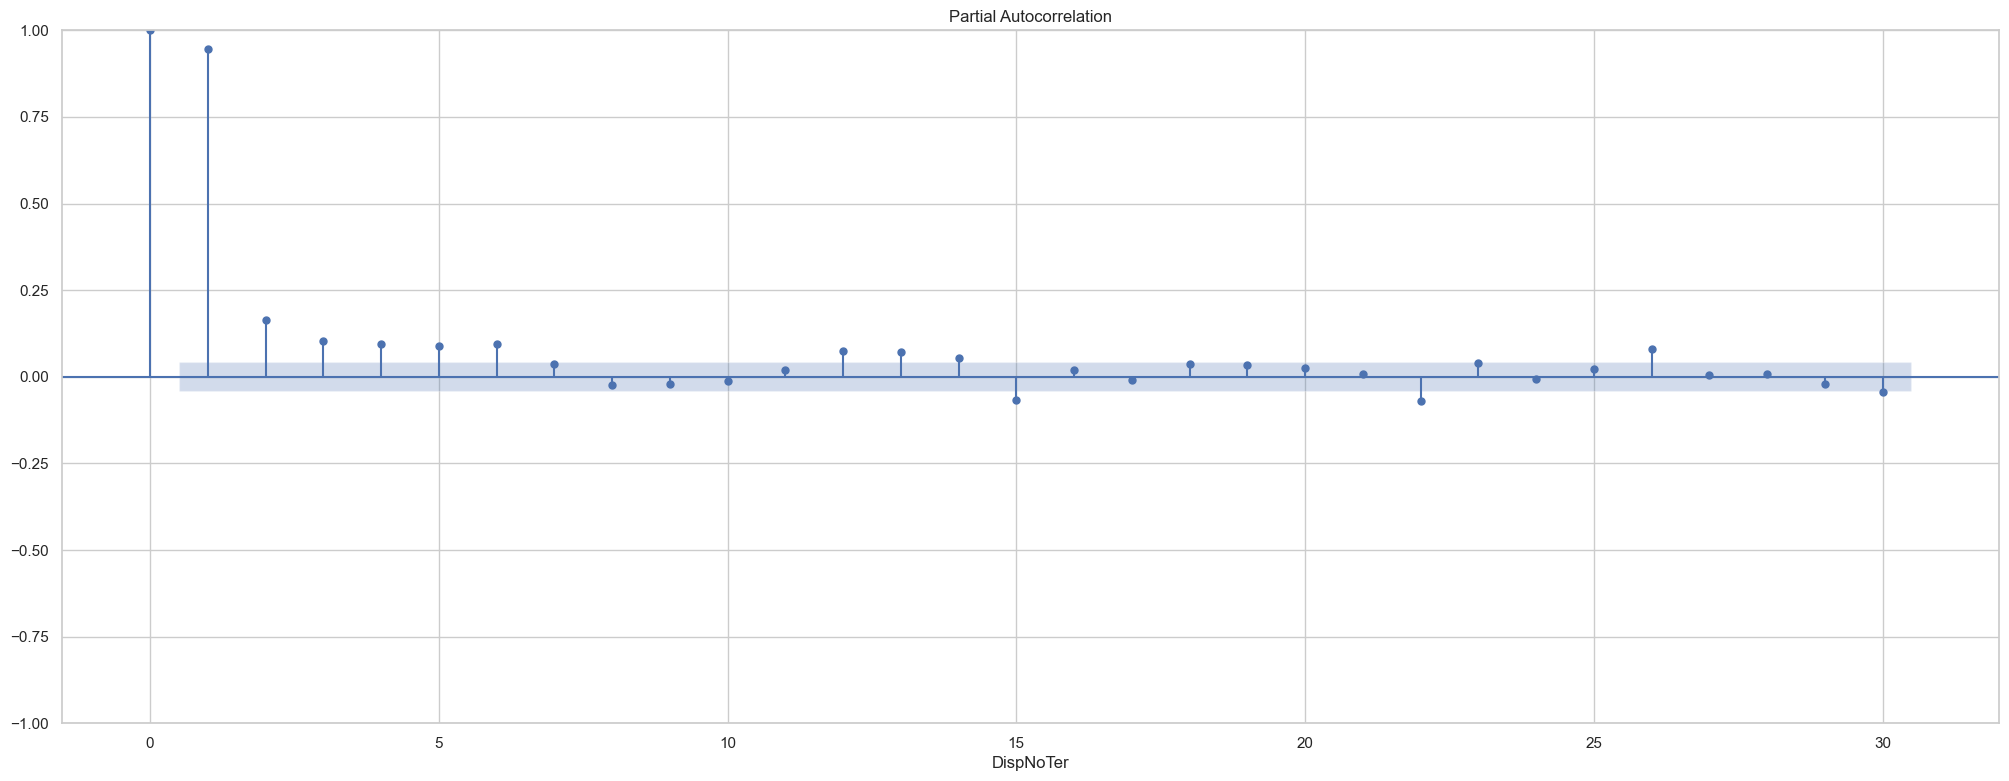

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


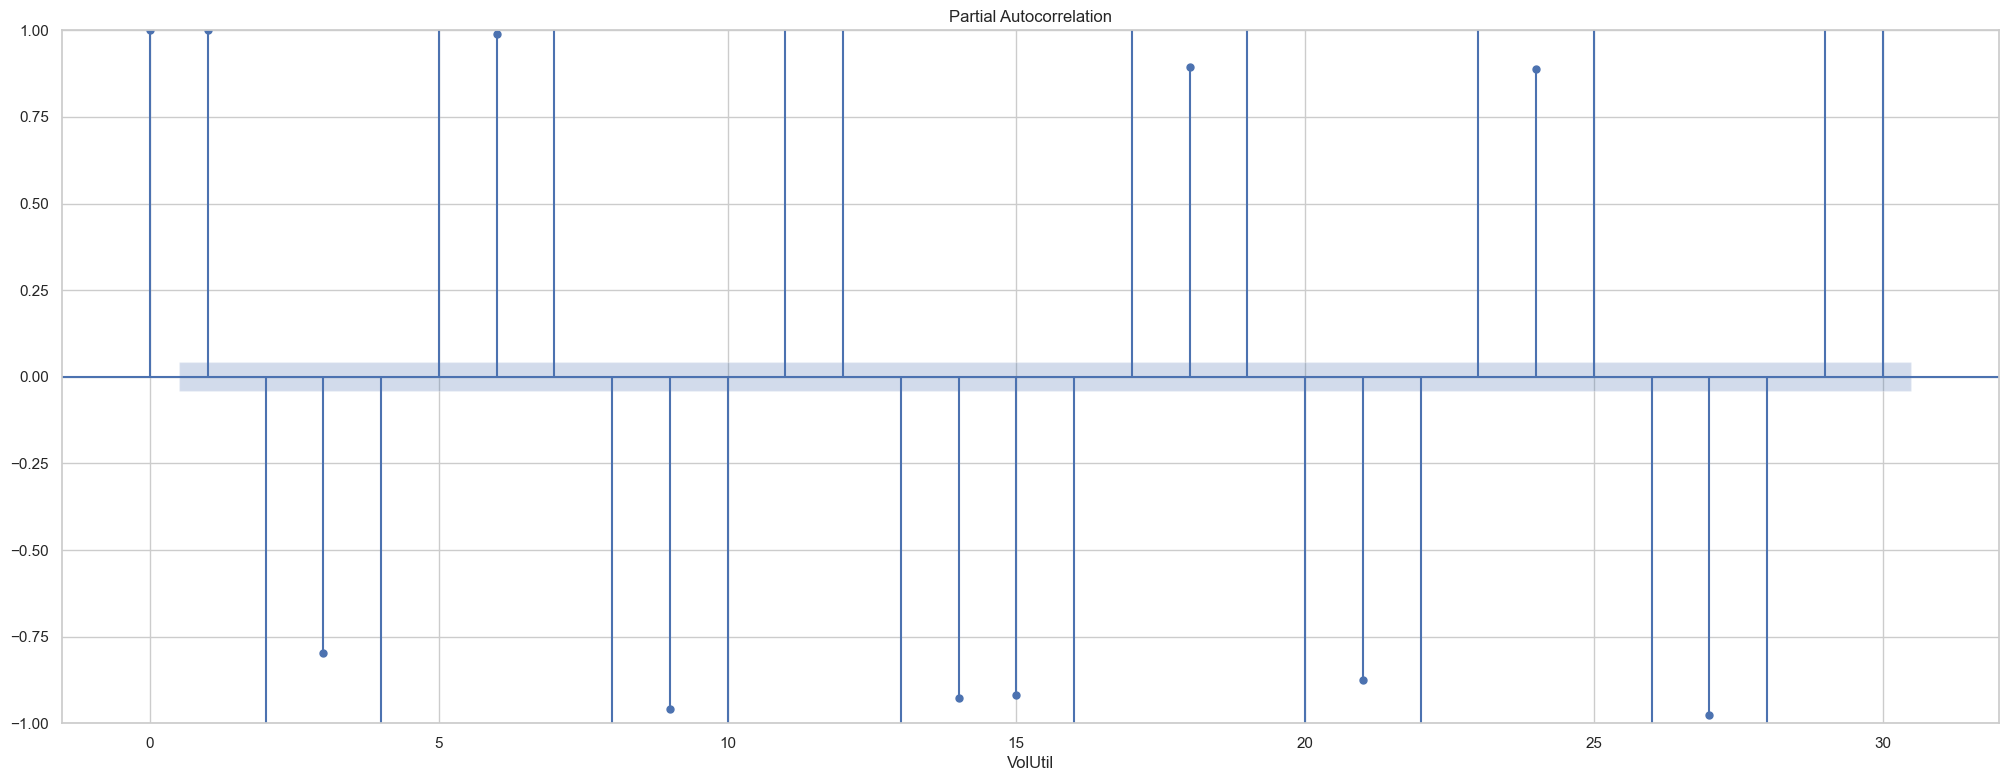

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


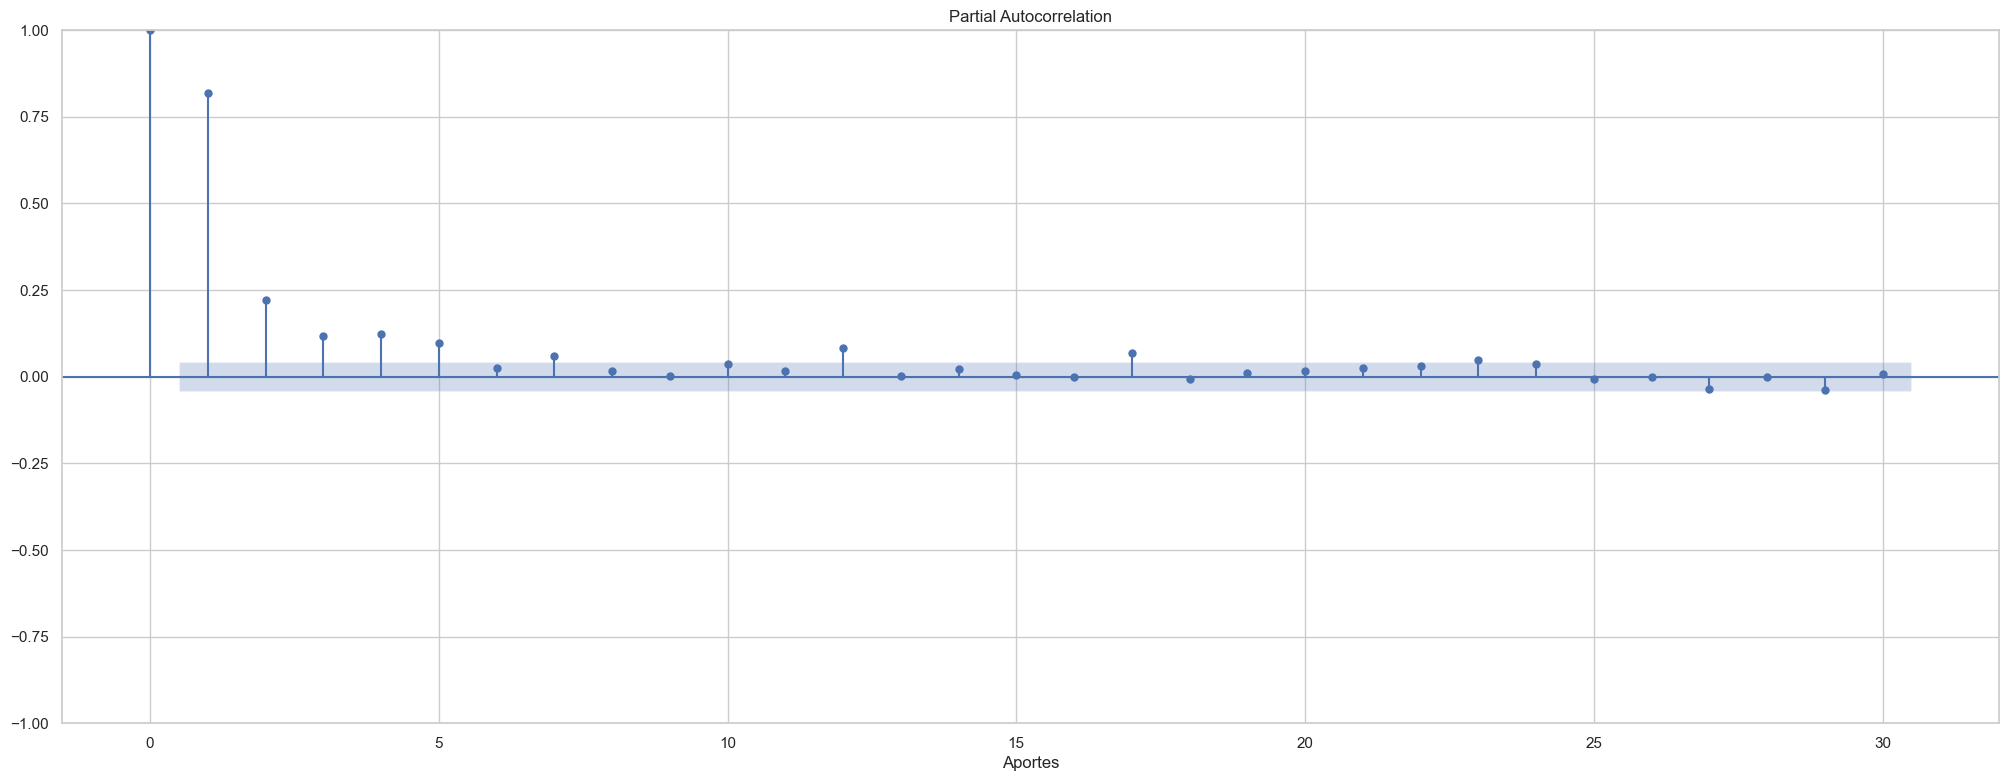

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


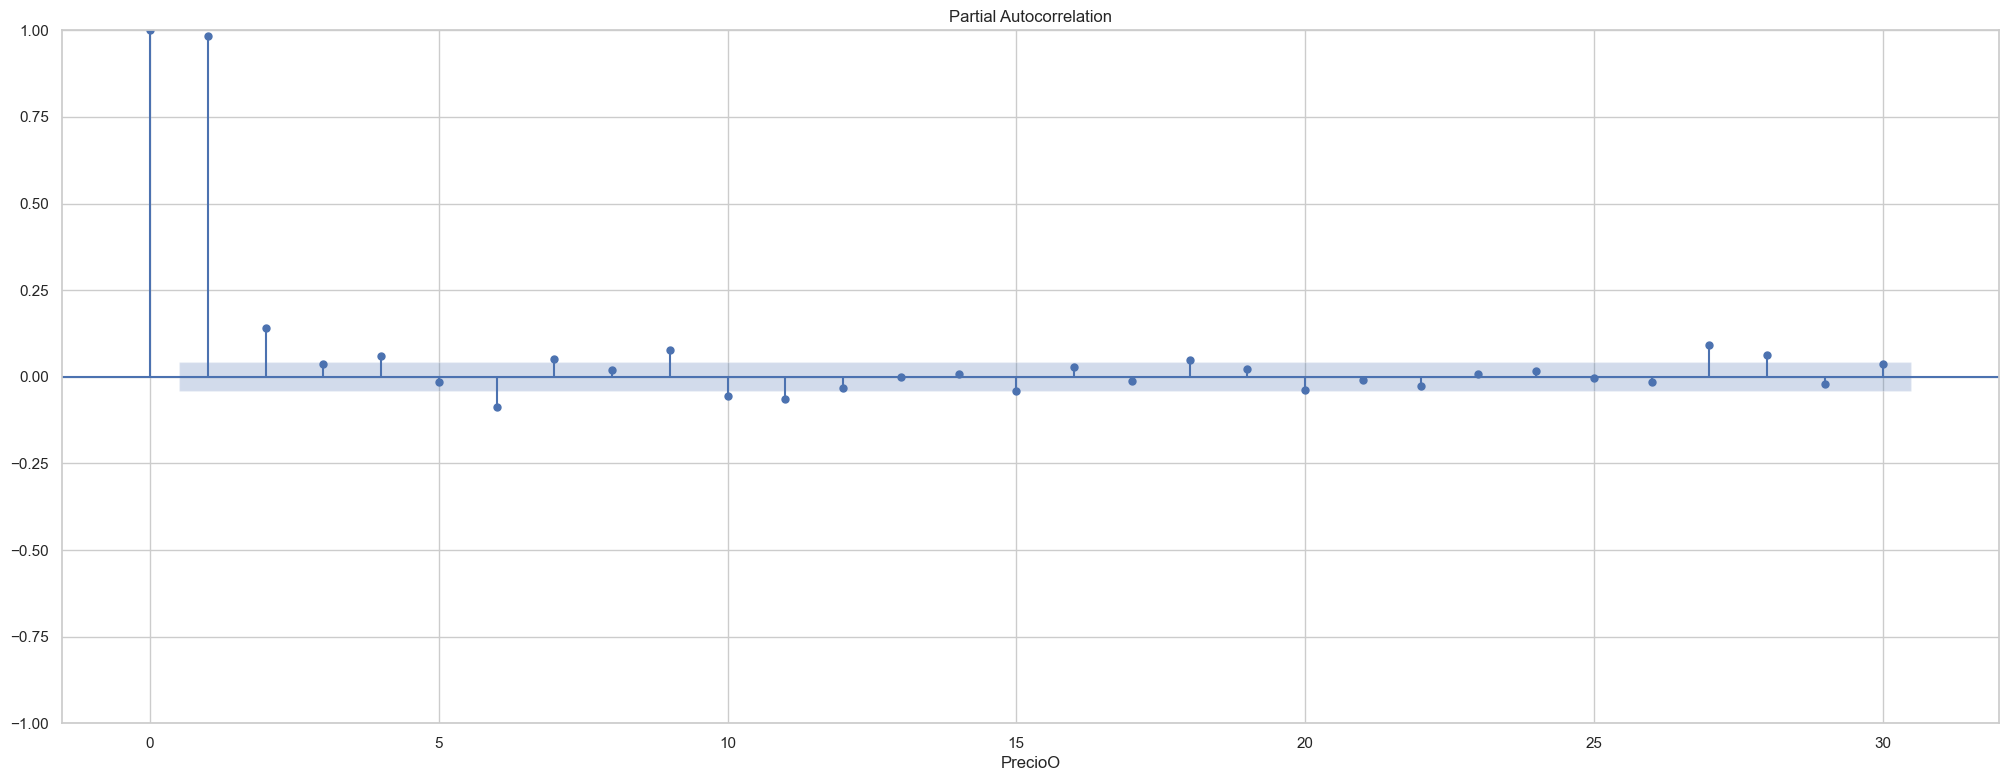

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


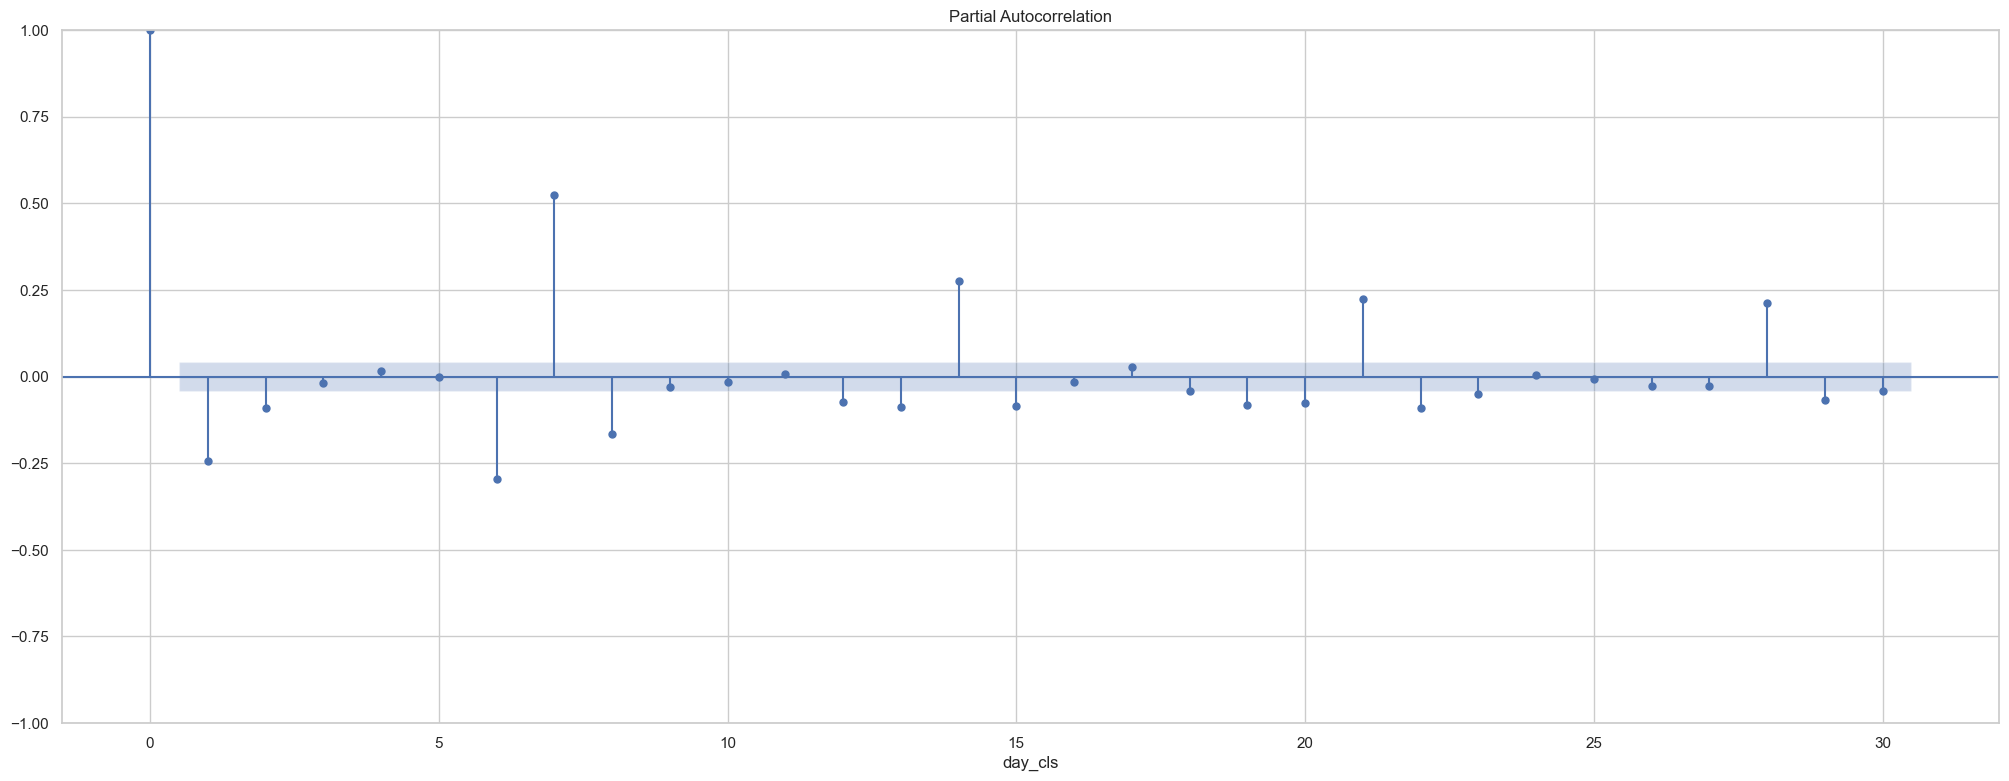

In [113]:
for names in names_col:
    datapafc=df_Data_pafc[[names]]
    plot_pacf(datapafc, lags=30)
    plt.xlabel(names)
    plt.show()